<a href="https://colab.research.google.com/github/jmmzhng-pro/DSCI_631_Project/blob/main/01_Data_Acquisition_EDA/Data_Acquisition_BLS_SEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSCI 631 Final Project**

- Group member
    - Name: Jonathan Watkins
    - Email: jfw68@drexel.edu
- Group member
    - Name: Jake Jarosik
    - Email: jj3268@drexel.edu
- Group member
    - Name: Jimmy Zhang
    - Email: jz876@drexel.edu


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#plotting tools
import plotly.offline as py
py.init_notebook_mode()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Retrieve Data from Wikapedia Via Web Scrape
import pandas as pd

def getSandP500Constituents(path = '/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/'):
  link = (
    "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"
  )
  data = pd.read_html(link, header=0)[0]
  data.to_csv(path + "constituents.csv", index=False)
  return data

In [4]:
#use above function
constituents_data = getSandP500Constituents()

In [5]:
constituents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [6]:
constituents_data['GICS Sector'].value_counts()

Industrials               77
Financials                72
Health Care               64
Information Technology    64
Consumer Discretionary    53
Consumer Staples          38
Real Estate               31
Utilities                 30
Materials                 29
Energy                    23
Communication Services    22
Name: GICS Sector, dtype: int64

In [7]:
constituents_data['GICS Sub-Industry'].value_counts()

Health Care Equipment                           18
Industrial Machinery & Supplies & Components    15
Semiconductors                                  15
Electric Utilities                              13
Multi-Utilities                                 13
                                                ..
Consumer Electronics                             1
Health Care Technology                           1
Leisure Products                                 1
Single-Family Residential REITs                  1
Household Appliances                             1
Name: GICS Sub-Industry, Length: 127, dtype: int64

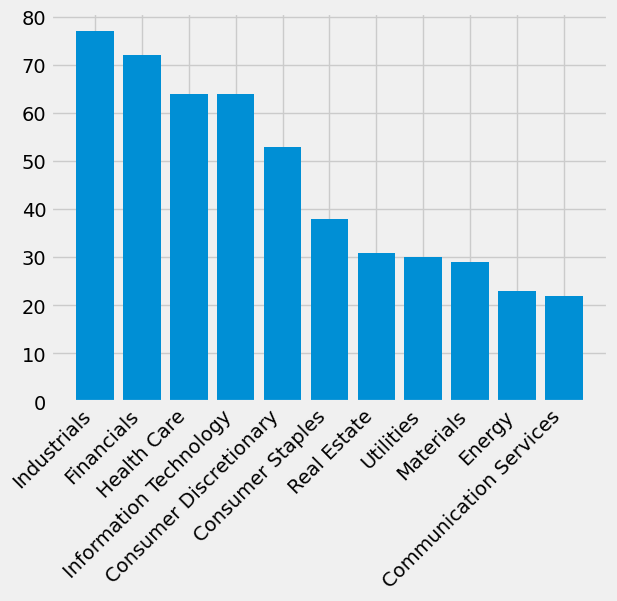

In [8]:
sectorCount = constituents_data['GICS Sector'].value_counts()
plt.bar(sectorCount.index, sectorCount)
plt.xticks(rotation=45, ha="right")
plt.show()

In [13]:
#Retrieve Data from BLS
import requests

def getBLSData(series, base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/', path = '/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/BLS/', label = ''):
  data_url = '{}{}'.format(base_url, series['id'])
  myHeaders = {'Content-type': 'application/json'}
  APIRequest = requests.get(data_url, params=series, headers=myHeaders).json()
  print('Status: ' + APIRequest['status'])
  data = pd.DataFrame(APIRequest['Results']['series'][0]['data'])
  data.to_csv(path + label + '_' + series['id'] + ".csv", index=False)
  return data

In [19]:
#use above funciton

CPISeriesInfo = {'id': 'CUSR0000SA0',
                'name': 'All items in U.S. city average, all urban consumers, seasonally adjusted',
                "startyear":"2008",
                "endyear":"2023",
                "calculations":True,
                "registrationkey":"f64b67c8434042938fb3fc23bc840110"}

CPIDataframe = getBLSData(series=CPISeriesInfo, label= 'CPI')

Status: REQUEST_SUCCEEDED


In [20]:
CPIDataframe

year period periodName latest    value footnotes  \
0    2023    M10    October   true  307.619      [{}]   
1    2023    M09  September    NaN  307.481      [{}]   
2    2023    M08     August    NaN  306.269      [{}]   
3    2023    M07       July    NaN  304.348      [{}]   
4    2023    M06       June    NaN  303.841      [{}]   
..    ...    ...        ...    ...      ...       ...   
185  2008    M05        May    NaN  215.208      [{}]   
186  2008    M04      April    NaN  213.942      [{}]   
187  2008    M03      March    NaN  213.448      [{}]   
188  2008    M02   February    NaN  212.687      [{}]   
189  2008    M01    January    NaN  212.174      [{}]   

                                          calculations  
0    {'net_changes': {}, 'pct_changes': {'1': '0.0'...  
1    {'net_changes': {}, 'pct_changes': {'1': '0.4'...  
2    {'net_changes': {}, 'pct_changes': {'1': '0.6'...  
3    {'net_changes': {}, 'pct_changes': {'1': '0.2'...  
4    {'net_changes': {}, 'pct_changes': {'1': '0.2'...  
..                                                 ...  
185  {'net_changes': {}, 'pct_changes': {'1': '0.6'...  
186  {'net_changes': {}, 'pct_changes': {'1': '0.2'...  
187  {'net_changes': {}, 'pct_changes': {'1': '0.4'...  
188  {'net_changes': {}, 'pct_changes': {'1': '0.2'...  
189  {'net_changes': {}, 'pct_changes': {'1': '0.3'...  

[190 rows x 7 columns]

In [21]:
# CPI EDA
CPIDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          190 non-null    object
 1   period        190 non-null    object
 2   periodName    190 non-null    object
 3   latest        1 non-null      object
 4   value         190 non-null    object
 5   footnotes     190 non-null    object
 6   calculations  190 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [22]:
#prelimary preprocessing - get time, fix data types, unpack nested data
import datetime

CPIDateTime = CPIDataframe['value'].copy() # get a series the length of the df
CPIMoMPercent = CPIDataframe['value'].copy() # get a series the length of the df
CPI3MPercent = CPIDataframe['value'].copy() # get a series the length of the df
CPI6MPercent = CPIDataframe['value'].copy() # get a series the length of the df
CPIYoYPercent = CPIDataframe['value'].copy() # get a series the length of the df

for i, r in CPIDataframe.iterrows():
  CPIDateTime[i] = datetime.datetime(int(r['year']), int(r['period'][-2:]), 1)
  CPIMoMPercent[i] = r['calculations']['pct_changes']['1']
  CPI3MPercent[i] = r['calculations']['pct_changes']['3']
  CPI6MPercent[i] = r['calculations']['pct_changes']['6']
  CPIYoYPercent[i] = r['calculations']['pct_changes']['12']

CPIDataframe['DateTime'] = CPIDateTime.apply(pd.to_datetime)
CPIDataframe['MonthOverMonth'] = CPIMoMPercent.apply(float)
CPIDataframe['3-Month'] = CPI3MPercent.apply(float)
CPIDataframe['6-Month'] = CPI6MPercent.apply(float)
CPIDataframe['YearOverYear'] = CPIYoYPercent.apply(float)
CPIDataframe['value'] = CPIDataframe['value'].apply(float)

CPIDataframe.to_csv("/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/BLS/CPI_flattened.csv", index=False)

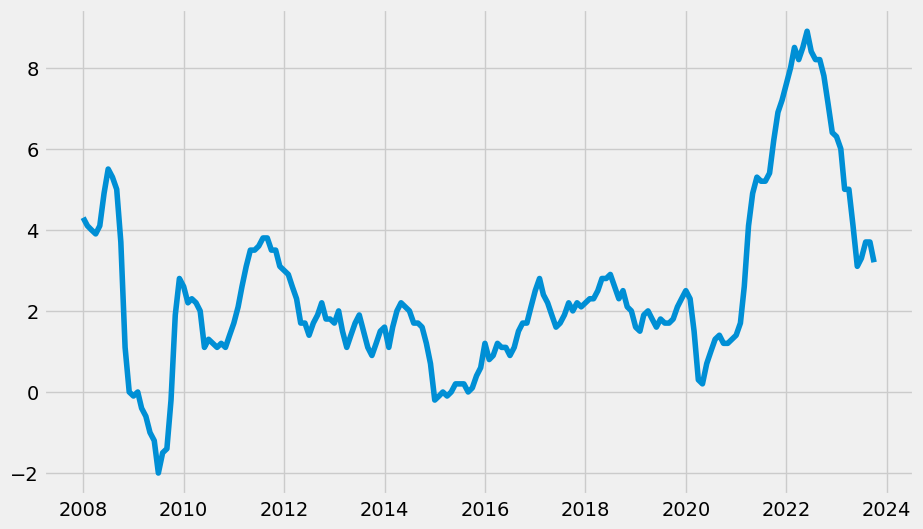

In [49]:
#plot
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(CPIDataframe['DateTime'], CPIDataframe['YearOverYear'])
plt.show()

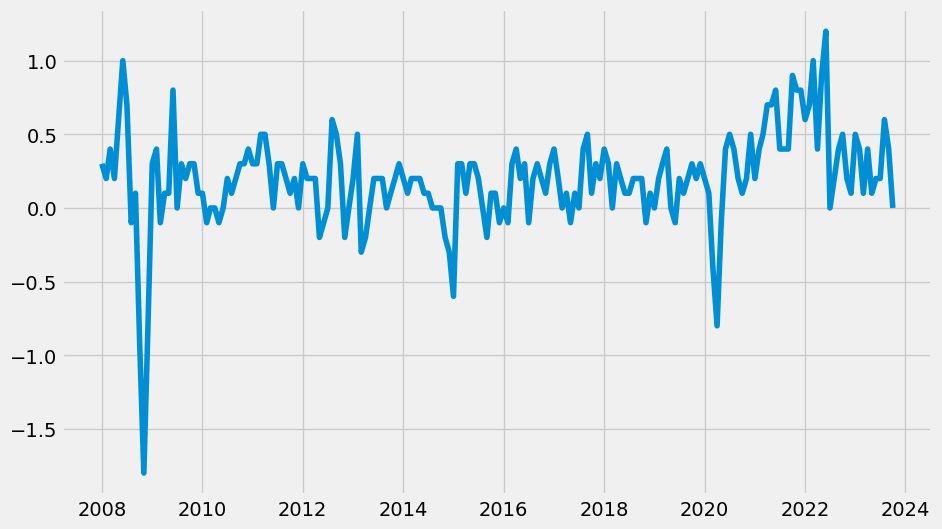

In [50]:
plt.figure(figsize = (10,6))
plt.plot(CPIDataframe['DateTime'], CPIDataframe['MonthOverMonth'])
plt.show()

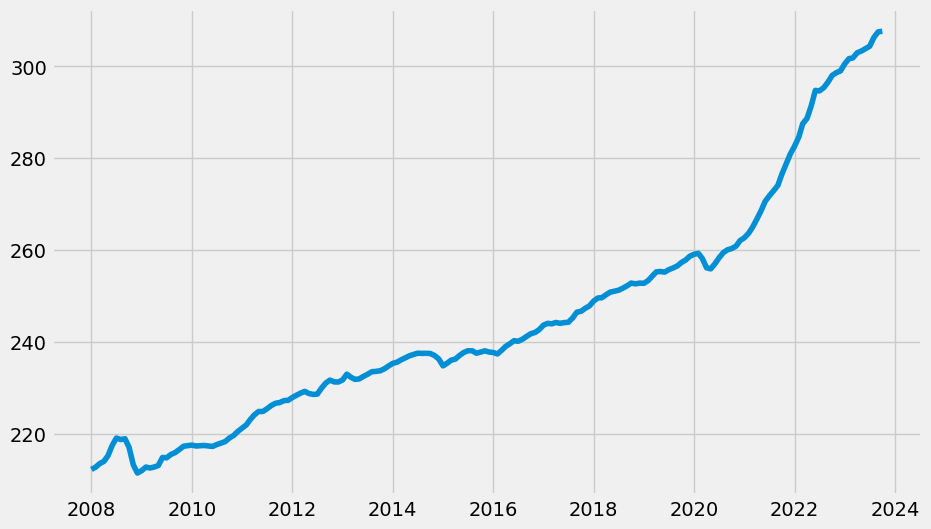

In [51]:
plt.figure(figsize = (10,6))
plt.plot(CPIDataframe['DateTime'], CPIDataframe['value'])
plt.show()

In [25]:
# Unemployment Data
UnemploySeriesInfo = {'id': 'LNS14000000',
                    'name': 'Unemployment Rate, seasonally adjusted',
                    "startyear":"2008",
                "endyear":"2023",
                "calculations":True,
                "registrationkey":"f64b67c8434042938fb3fc23bc840110"}

UnemploymentDataframe = getBLSData(series=UnemploySeriesInfo, label= 'Unemployment')

Status: REQUEST_SUCCEEDED


In [26]:
#prelimary preprocessing - get time, fix data types, unpack nested data

UnemploymentDateTime = UnemploymentDataframe['value'].copy() # get a series the length of the df
UnemploymentMoMPercent = UnemploymentDataframe['value'].copy() # get a series the length of the df
Unemployment3MPercent = UnemploymentDataframe['value'].copy() # get a series the length of the df
Unemployment6MPercent = UnemploymentDataframe['value'].copy() # get a series the length of the df
UnemploymentYoYPercent = UnemploymentDataframe['value'].copy() # get a series the length of the df

for i, r in UnemploymentDataframe.iterrows():
  UnemploymentDateTime[i] = datetime.datetime(int(r['year']), int(r['period'][-2:]), 1)
  UnemploymentMoMPercent[i] = r['calculations']['net_changes']['1']
  Unemployment3MPercent[i] = r['calculations']['net_changes']['3']
  Unemployment6MPercent[i] = r['calculations']['net_changes']['6']
  UnemploymentYoYPercent[i] = r['calculations']['net_changes']['12']

UnemploymentDataframe['DateTime'] = UnemploymentDateTime.apply(pd.to_datetime)
UnemploymentDataframe['MonthOverMonth'] = UnemploymentMoMPercent.apply(float)
UnemploymentDataframe['3-Month'] = Unemployment3MPercent.apply(float)
UnemploymentDataframe['6-Month'] = Unemployment6MPercent.apply(float)
UnemploymentDataframe['YearOverYear'] = UnemploymentYoYPercent.apply(float)
UnemploymentDataframe['value'] = UnemploymentDataframe['value'].apply(float)

UnemploymentDataframe.to_csv("/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/BLS/unemployment_flattened.csv", index=False)

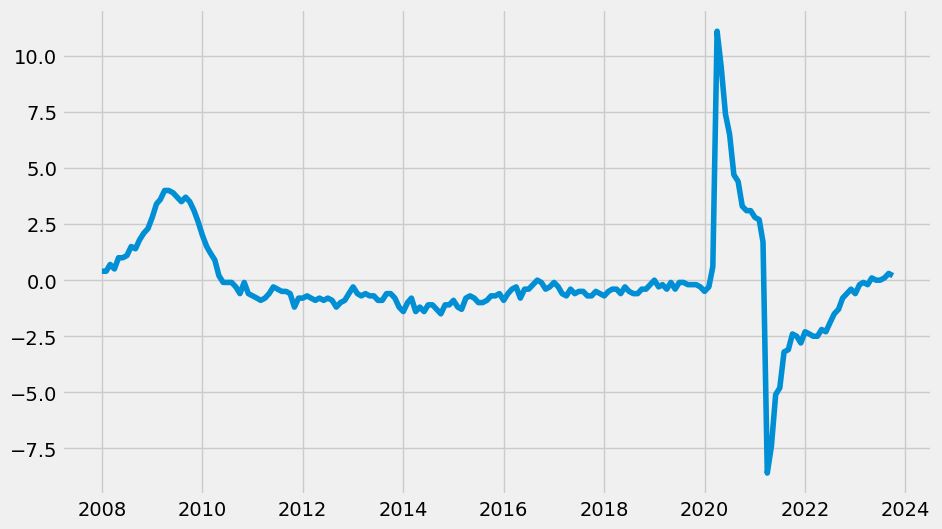

In [52]:
plt.figure(figsize = (10,6))
plt.plot(UnemploymentDataframe['DateTime'], UnemploymentDataframe['YearOverYear'])
plt.show()

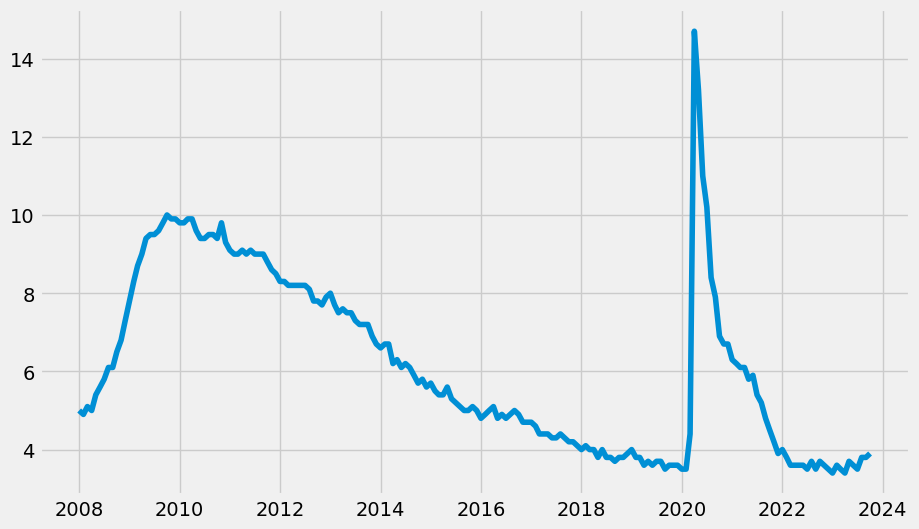

In [53]:
plt.figure(figsize = (10,6))
plt.plot(UnemploymentDataframe['DateTime'], UnemploymentDataframe['value'])
plt.show()

In [35]:
# PPI Data 1
ppiSeriesInfo = {'id': 'PCUOMFG--OMFG--',
                'name': 'PPI industry group data for Total manufacturing industries, not seasonally adjusted',
                 "startyear":"2008",
                "endyear":"2023",
                "calculations":True,
                "registrationkey":"f64b67c8434042938fb3fc23bc840110"}

ppiDataframe = getBLSData(series=ppiSeriesInfo, label='PPI_manufacturing')

Status: REQUEST_SUCCEEDED


In [54]:
#PPI Data 2
ppiSeriesInfo = {'id': 'PCU22112222112241',
                'name': 'PPI industry - seasonally adjusted',
                 "startyear":"2008",
                "endyear":"2023",
                "calculations":True,
                "registrationkey":"f64b67c8434042938fb3fc23bc840110"}

ppiDataframe = getBLSData(series=ppiSeriesInfo, label='PPI_industry')

Status: REQUEST_SUCCEEDED


In [31]:
#PPI Data 3
ppiSeriesInfo = {'id': 'WPS141101',
                'name': 'PPI commodities - seasonally adjusted',
                 "startyear": "2008",
                "endyear": "2023",
                "calculations": True,
                "registrationkey": "f64b67c8434042938fb3fc23bc840110"}

ppiDataframe = getBLSData(series=ppiSeriesInfo, label='PPI_commod')

Status: REQUEST_SUCCEEDED


In [55]:
#prelimary preprocessing - get time, fix data types, unpack nested data

ppiDateTime = ppiDataframe['value'].copy() # get a series the length of the df
ppiMoMPercent = ppiDataframe['value'].copy() # get a series the length of the df
ppi3MPercent = ppiDataframe['value'].copy() # get a series the length of the df
ppi6MPercent = ppiDataframe['value'].copy() # get a series the length of the df
ppiYoYPercent = ppiDataframe['value'].copy() # get a series the length of the df

for i, r in ppiDataframe.iterrows():
  ppiDateTime[i] = datetime.datetime(int(r['year']), int(r['period'][-2:]), 1)
  ppiMoMPercent[i] = r['calculations']['pct_changes']['1']
  ppi3MPercent[i] = r['calculations']['pct_changes']['3']
  ppi6MPercent[i] = r['calculations']['pct_changes']['6']
  ppiYoYPercent[i] = r['calculations']['pct_changes']['12']

ppiDataframe['DateTime'] = ppiDateTime.apply(pd.to_datetime)
ppiDataframe['MonthOverMonth'] = ppiMoMPercent.apply(float)
ppiDataframe['3-Month'] = ppi3MPercent.apply(float)
ppiDataframe['6-Month'] = ppi6MPercent.apply(float)
ppiDataframe['YearOverYear'] = ppiYoYPercent.apply(float)
ppiDataframe['value'] = ppiDataframe['value'].apply(float)

ppiDataframe.to_csv("/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/BLS/PPI_manufacturing_flattened.csv", index=False)

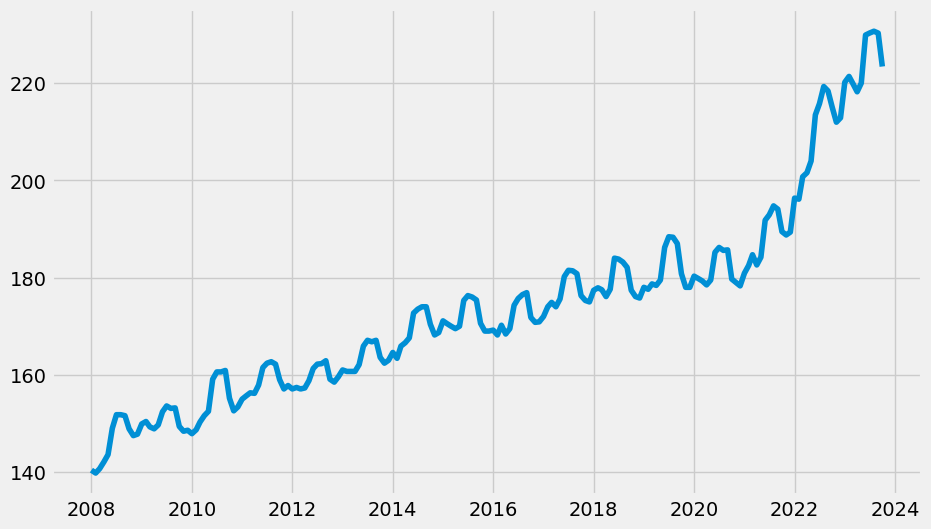

In [56]:
plt.figure(figsize = (10,6))
plt.plot(ppiDataframe['DateTime'], ppiDataframe['value'])
plt.show()

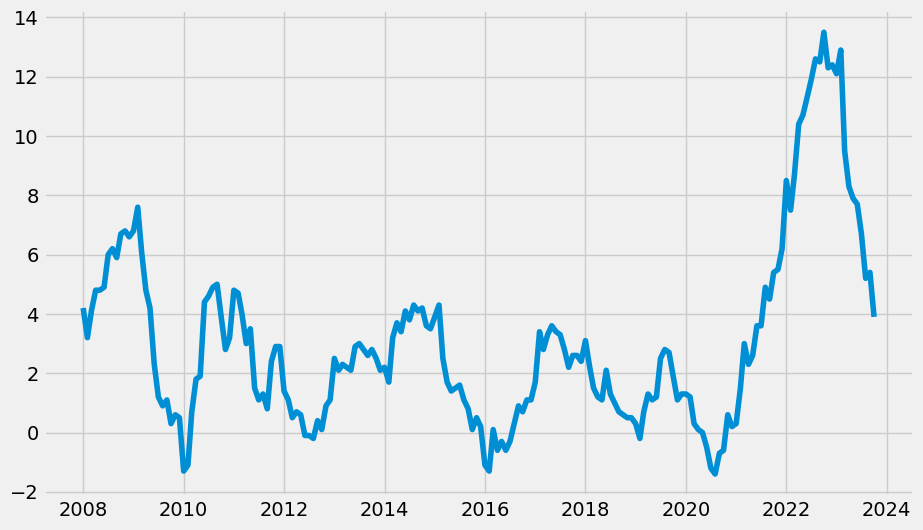

In [57]:
plt.figure(figsize = (10,6))
plt.plot(ppiDataframe['DateTime'], ppiDataframe['YearOverYear'])
plt.show()

In [58]:
#Consumer Expenditure Survey Data
cesSeriesInfo = {'id': 'CXUMENBOYSLB0101M',
                    'name': 'Consumer Expenditure Survey',
                 "startyear":"2008",
                "endyear":"2023",
                "calculations":True,
                "registrationkey":"f64b67c8434042938fb3fc23bc840110"}

cesDataframe = getBLSData(series=cesSeriesInfo, label='ConsumerExpenditureSurvey')

Status: REQUEST_SUCCEEDED


In [59]:
#prelimary preprocessing - get time, fix data types, unpack nested data

cesDateTime = cesDataframe['value'].copy() # get a series the length of the df
cesYoYPercent = cesDataframe['value'].copy() # get a series the length of the df

for i, r in cesDataframe.iterrows():
  cesDateTime[i] = datetime.datetime(int(r['year']), int(r['period'][-2:]), 1)
  cesYoYPercent[i] = r['calculations']['pct_changes']['12']

cesDataframe['DateTime'] = cesDateTime.apply(pd.to_datetime)
cesDataframe['YearOverYear'] = cesYoYPercent.apply(float)
cesDataframe['value'] = cesDataframe['value'].apply(float)

cesDataframe.to_csv("/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/BLS/ConsumerExpenditureSurvey_flattened.csv", index=False)

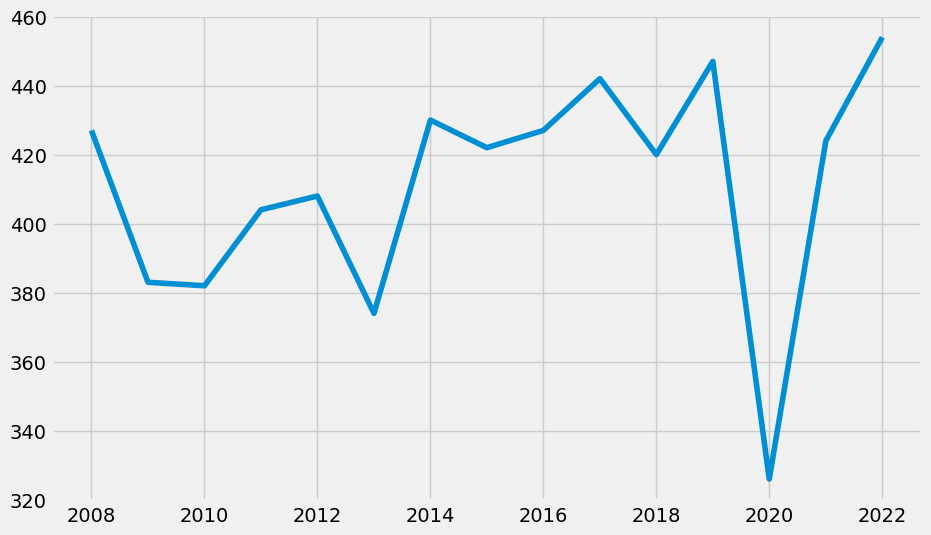

In [60]:
plt.figure(figsize = (10,6))
plt.plot(cesDataframe['DateTime'], cesDataframe['value'])
plt.show()

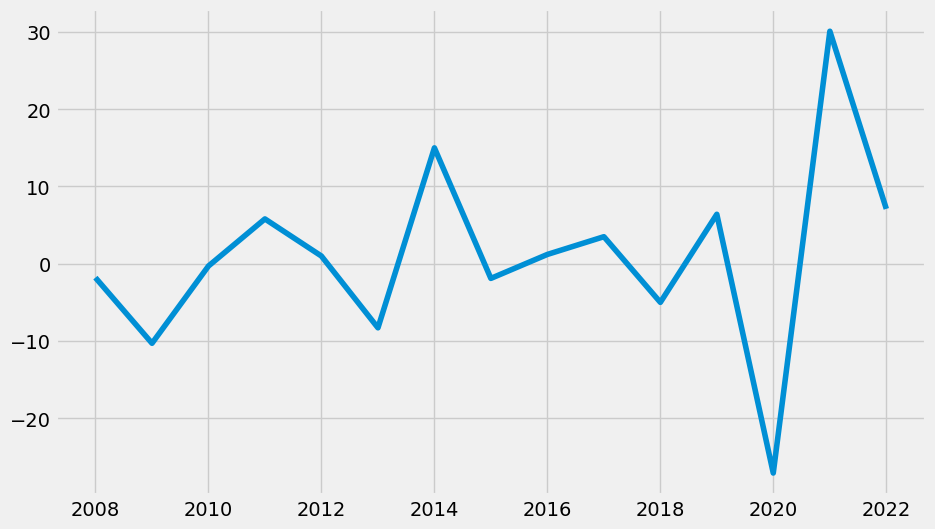

In [61]:
plt.figure(figsize = (10,6))
plt.plot(cesDataframe['DateTime'], cesDataframe['YearOverYear'])
plt.show()

Retrieving SEC Data

In [9]:
#SEC Data
%pip install -U sec-edgar-api
import sec_edgar_api as sec

In [10]:
import pandas as pd

#create SEC look up table of financial information
myClient = sec.EdgarClient(user_agent="Jimmy Zhang <jz876@drexel.edu>")
merckFacts =myClient.get_company_facts(cik="310158") #cik for merck
merckSECFilings = merckFacts['facts']['us-gaap']
lookupTable = pd.DataFrame(merckSECFilings.values(), columns= ['label','description'])
lookupTable.head(n=7)

label  \
0                          Accounts Payable, Current   
1  Accounts Receivable, after Allowance for Credi...   
2  Accounts Receivable, after Allowance for Credi...   
3                          Accounts Receivable, Sale   
4       Accrual for Environmental Loss Contingencies   
5                      Accrued Income Taxes, Current   
6  Accumulated Depreciation, Depletion and Amorti...   

                                         description  
0  Carrying value as of the balance sheet date of...  
1  Amount, after allowance for credit loss, of ri...  
2  Amount, after allowance for credit loss, of ri...  
3  Amount of decrease from sale of accounts recei...  
4  Total costs accrued as of the balance sheet da...  
5  Carrying amount as of the balance sheet date o...  
6  Amount of accumulated depreciation, depletion ...

In [11]:
#function to get SEC Filings and Download it in csv format
import os

def getSECData(CIK, ticker='not_specified', path = '/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/SEC/'):
  myClient = sec.EdgarClient(user_agent="Jimmy Zhang <jz876@drexel.edu>")
  myCIK = "{:010d}".format(CIK)
  companyFacts =myClient.get_company_facts(cik=myCIK)
  myTickerFolder = os.path.join(path, ticker)
  if not os.path.exists(myTickerFolder):
    os.mkdir(os.path.join(path, ticker))
  myData = companyFacts['facts']['us-gaap']
  mySeriesNames = list()
  myDfList = list()
  for k, v in myData.items():
    mySeriesNames.append(k)
    nestedKey = list(v['units'].keys())[0]
    myDfList.append(pd.DataFrame(v['units'][nestedKey]))
    myDfList[-1]['unit'] = nestedKey
    myDfList[-1].to_csv(os.path.join(path, ticker, k + ".csv"), index=False)
  return mySeriesNames, myDfList

In [ ]:
#download all s & p 500 constituents' SEC data
import time

for i, r in constituents_data.iterrows():
  try:
    getSECData(r['CIK'], ticker = r['Symbol'])
    time.sleep(2) #help with api speed limit
  except:
    print(f'Error retreiving SEC Data for: {r.Symbol} | {r.CIK}')
    pass

Error retreiving SEC Data for: AMCR | 1748790


In [210]:
#testing the function with Merck SEC Data
merckDataSeriesNames, merckSECDfList = getSECData(310158, ticker = 'MRK')

In [211]:
#alot of potential features from just one public company, Merck
print(merckDataSeriesNames)
len(merckDataSeriesNames)

['AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccountsReceivableNetNoncurrent', 'AccountsReceivableSale', 'AccrualForEnvironmentalLossContingencies', 'AccruedIncomeTaxesCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossDefinedBenefitPensionAndOtherPostretirementPlansNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AcquiredFiniteLivedIntangibleAssetAmount', 'AdditionalPaidInCapital', 'AdditionalPaidInCapitalCommonStock', 'AdjustmentForAmortization', 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther', 'AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisit

745

In [212]:
#sort to see what SEC filing information has the most data points
merckDataZip = zip(merckDataSeriesNames, merckSECDfList)
merckDataZip_sortBySize = list(sorted(merckDataZip, key= lambda sp : sp[1].size, reverse=True))


#print top 25
for i in range(25):
  print(i, ". ", merckDataZip_sortBySize[i][0])

0 .  StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest
1 .  CommonStockDividendsPerShareDeclared
2 .  EarningsPerShareBasic
3 .  EarningsPerShareDiluted
4 .  IncomeTaxExpenseBenefit
5 .  NetIncomeLoss
6 .  OtherNonoperatingIncomeExpense
7 .  ResearchAndDevelopmentExpense
8 .  SellingGeneralAndAdministrativeExpense
9 .  NetIncomeLossAttributableToNoncontrollingInterest
10 .  RestructuringCharges
11 .  EffectiveIncomeTaxRateContinuingOperations
12 .  ForeignCurrencyTransactionGainLossBeforeTax
13 .  InterestExpense
14 .  InvestmentIncomeInterest
15 .  WeightedAverageNumberDilutedSharesOutstandingAdjustment
16 .  WeightedAverageNumberOfDilutedSharesOutstanding
17 .  WeightedAverageNumberOfSharesOutstandingBasic
18 .  AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount
19 .  RestructuringAndRelatedCostIncurredCost
20 .  CashAndCashEquivalentsAtCarryingValue
21 .  ShareBasedCompensation
22 .  IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordi

In [213]:
#Let's look at one SEC feature / tag
print(merckDataZip_sortBySize[0][0])
print(merckDataZip_sortBySize[0][1].dtypes)
merckDataZip_sortBySize[0][1].head(20)

StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest
end      object
val       int64
accn     object
fy        int64
fp       object
form     object
filed    object
frame    object
unit     object
dtype: object


end          val                  accn    fy  fp  form       filed  \
0   2006-12-31  19965800000  0000950123-10-018679  2009  FY  10-K  2010-03-01   
1   2007-12-31  20591400000  0000950123-10-018679  2009  FY  10-K  2010-03-01   
2   2007-12-31  20591000000  0000950123-11-019286  2010  FY  10-K  2011-02-28   
3   2008-12-31  21167100000  0000950123-10-018679  2009  FY  10-K  2010-03-01   
4   2008-12-31  21167100000  0000950123-10-074336  2010  Q2  10-Q  2010-08-06   
5   2008-12-31  21167100000  0000950123-10-102135  2010  Q3  10-Q  2010-11-08   
6   2008-12-31  21167000000  0000950123-11-019286  2010  FY  10-K  2011-02-28   
7   2008-12-31  21167000000  0001193125-12-084319  2011  FY  10-K  2012-02-28   
8   2009-06-30  22736800000  0000950123-10-074336  2010  Q2  10-Q  2010-08-06   
9   2009-09-30  25349300000  0000950123-10-102135  2010  Q3  10-Q  2010-11-08   
10  2009-12-31  61492600000  0000950123-10-018679  2009  FY  10-K  2010-03-01   
11  2009-12-31  61492600000  0000950123-10-045997  2010  Q1  10-Q  2010-05-07   
12  2009-12-31  61492600000  0000950123-10-074336  2010  Q2  10-Q  2010-08-06   
13  2009-12-31  61484800000  0000950123-10-102135  2010  Q3  10-Q  2010-11-08   
14  2009-12-31  61485000000  0000950123-11-019286  2010  FY  10-K  2011-02-28   
15  2009-12-31  61485000000  0000950123-11-047041  2011  Q1  10-Q  2011-05-09   
16  2009-12-31  61485000000  0000950123-11-074096  2011  Q2  10-Q  2011-08-08   
17  2009-12-31  61485000000  0000950123-11-096564  2011  Q3  10-Q  2011-11-08   
18  2009-12-31  61485000000  0001193125-12-084319  2011  FY  10-K  2012-02-28   
19  2009-12-31  61485000000  0001193125-13-084618  2012  FY  10-K  2013-02-28   

        frame unit  
0   CY2006Q4I  USD  
1         NaN  USD  
2   CY2007Q4I  USD  
3         NaN  USD  
4         NaN  USD  
5         NaN  USD  
6         NaN  USD  
7   CY2008Q4I  USD  
8   CY2009Q2I  USD  
9   CY2009Q3I  USD  
10        NaN  USD  
11        NaN  USD  
12        NaN  USD  
13        NaN  USD  
14        NaN  USD  
15        NaN  USD  
16        NaN  USD  
17        NaN  USD  
18        NaN  USD  
19  CY2009Q4I  USD

In [214]:
#import merck stock price data
mrk_stock_price = pd.read_csv('/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/StockPrice/MRK.csv')

In [215]:
#function to convert to pandas of string of time to date
from dateutil import parser
from datetime import datetime

def transform_to_date(pandas_object, col_name=''):
  if col_name == '':
    pandas_object = pandas_object.apply(parser.parse).apply(datetime.date)
    return pandas_object
  else:
    pandas_object[col_name] = pandas_object['col_name'].apply(parser.parse).apply(datetime.date)
    return pandas_object[col_name]

In [216]:
#function to prepare SEC Data and merge with Stock Data for correlate
def sec_stock_merge_df(sec_df, stock_df):
  #prepare df's
  sec_df_copy = sec_df.copy()
  sec_df_copy['end'] = transform_to_date(sec_df_copy['end'])
  sec_df_subset = sec_df_copy[(sec_df_copy['form'] == '10-K') & (sec_df_copy['frame'].notna())] #subset to only quarterly reports and where frame is specified
  stock_df_copy = stock_df.copy()
  stock_df_copy['Date'] = transform_to_date(stock_df_copy['Date'])
  stock_df_copy['Daily Open minus Close'] = stock_df_copy['Open'] - stock_df_copy['Close']

  #merge
  merged_df = pd.merge(left=sec_df_subset, left_on='end',
                        right=stock_df_copy, right_on='Date', how='inner')

  return merged_df

In [217]:
#Function to Create Plot
def plot_sec_stock(merged_df, sec_tagname = ''):
  t = merged_df['Date']
  data1 = merged_df['val']
  data2 = merged_df['Daily Open minus Close']

  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('Date')
  ax1.set_ylabel(sec_tagname, color=color)
  ax1.scatter(t, data1, color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('Daily Change in Stock Price', color=color)  # we already handled the x-label with ax1
  ax2.scatter(t, data2, color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  fig.set_size_inches(15, 12)
  plt.show()

  return

In [218]:
#correlation function
import seaborn as sns
import matplotlib.pyplot as plt

def corr_sec_stock(df):
  plt.figure(figsize=(4,4))
  sns.heatmap(df[['val', 'Daily Open minus Close']].corr(), cmap='RdBu_r', annot=True)
  plt.show()

  return

Graphing: StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest


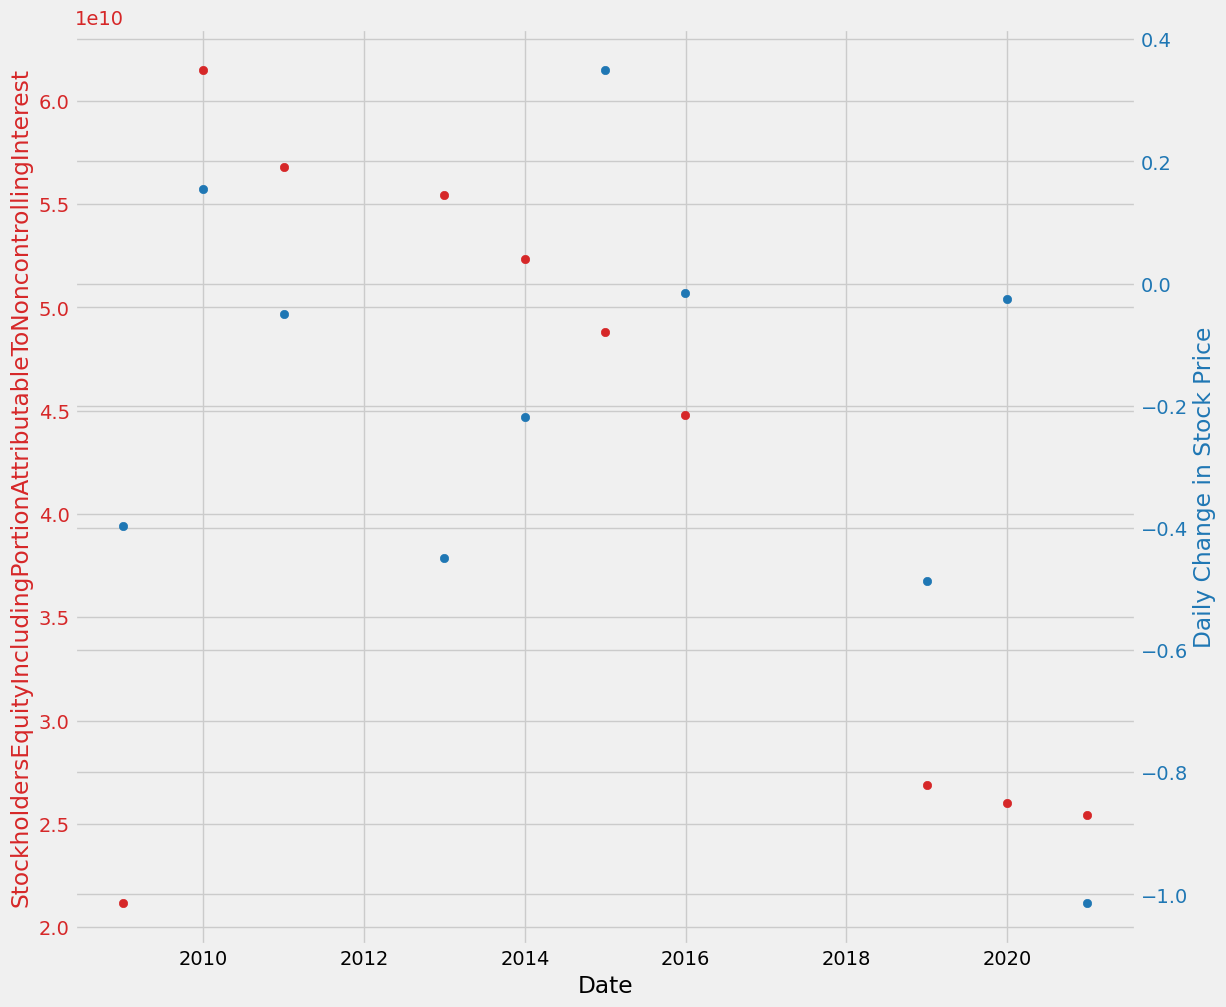

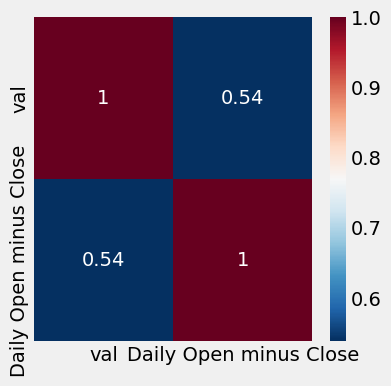






Graphing: CommonStockDividendsPerShareDeclared


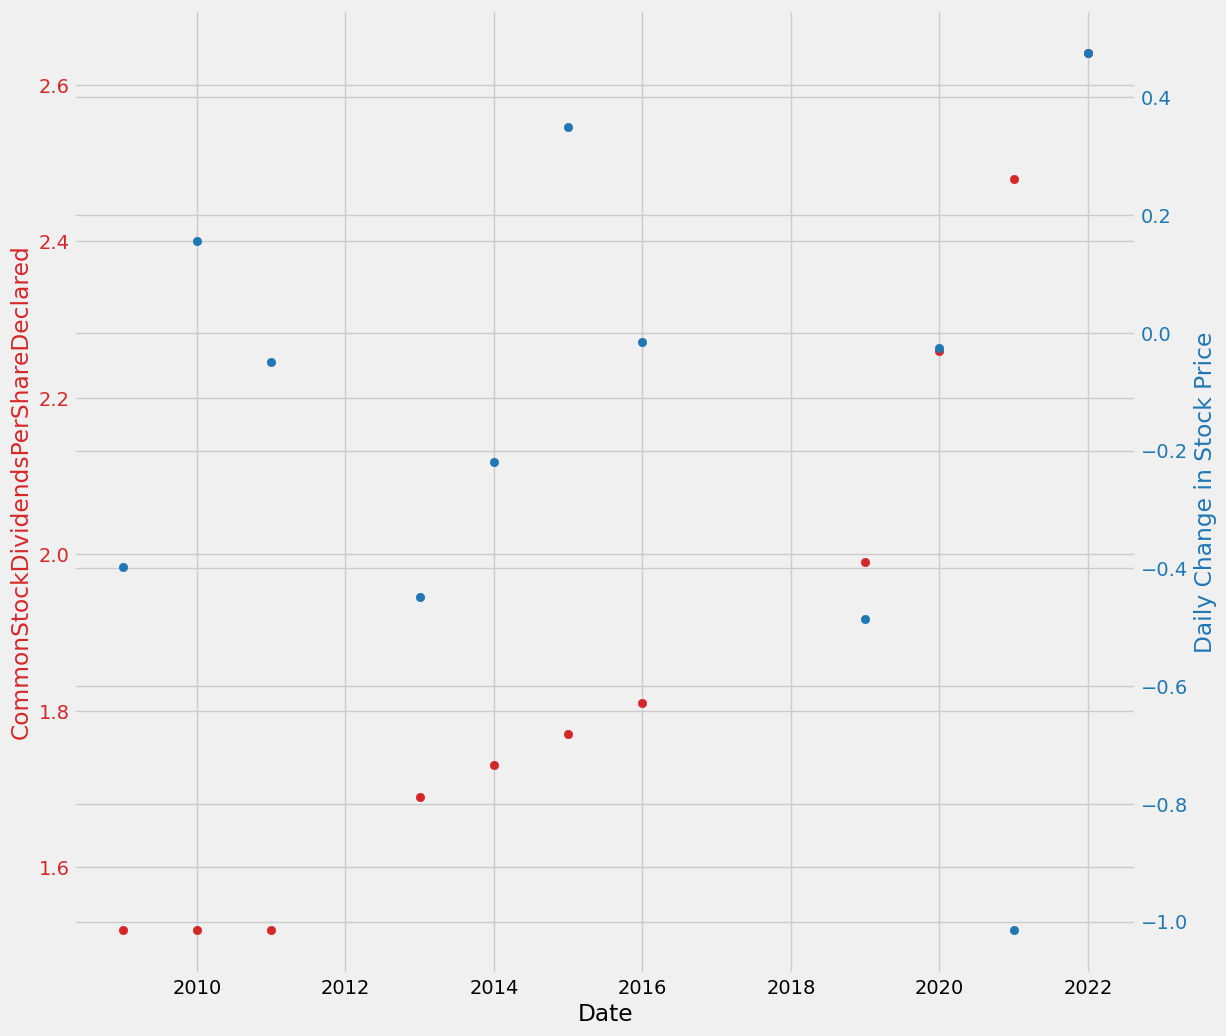

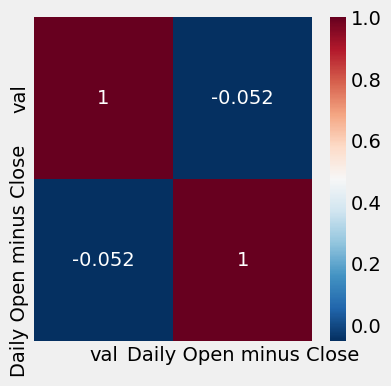






Graphing: EarningsPerShareBasic


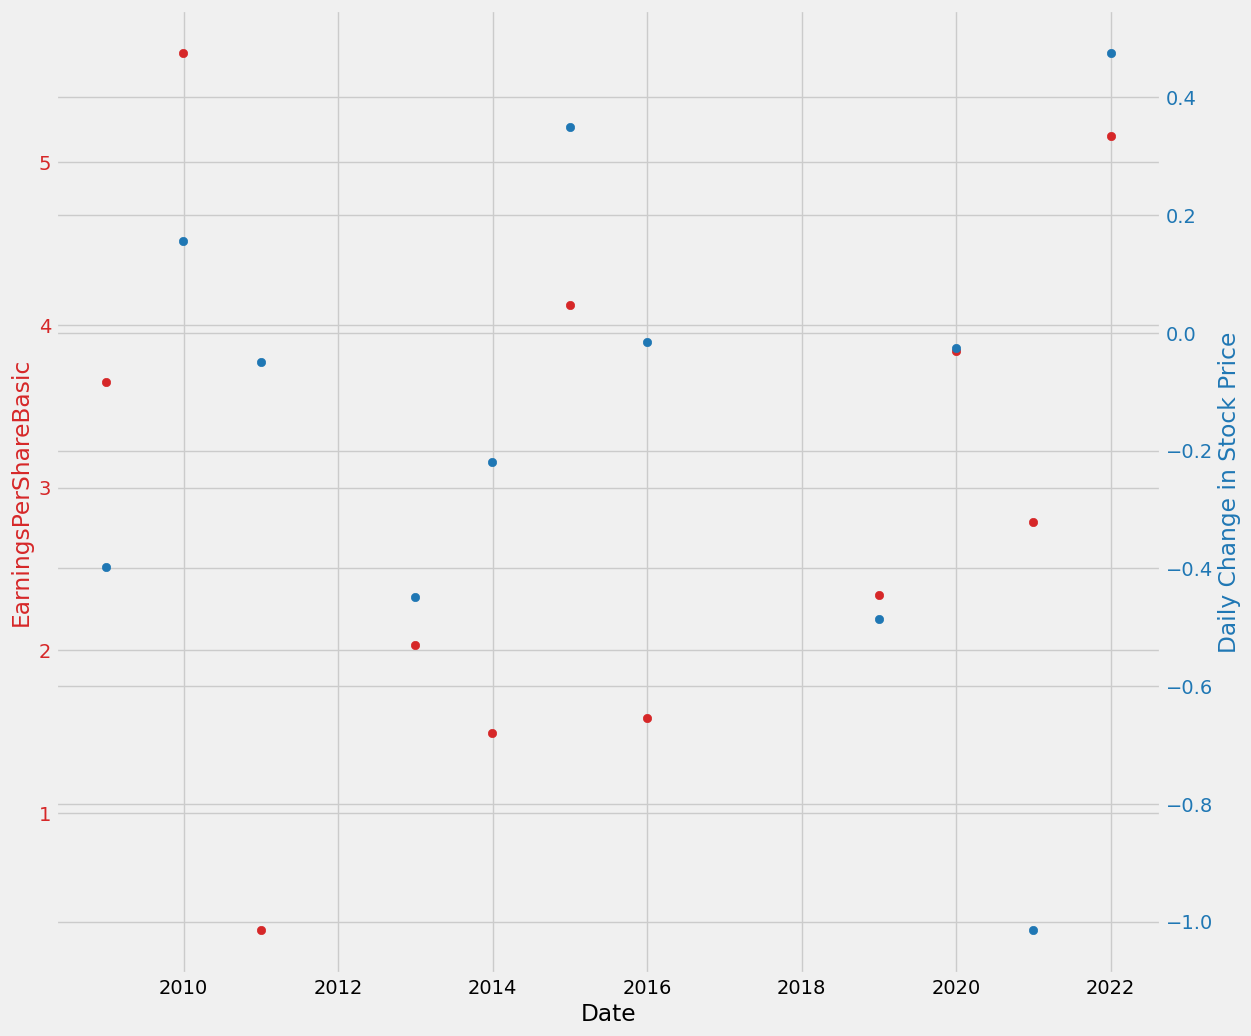

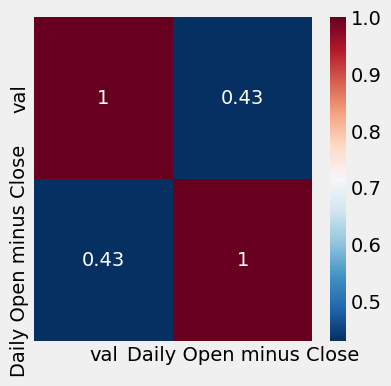






Graphing: EarningsPerShareDiluted


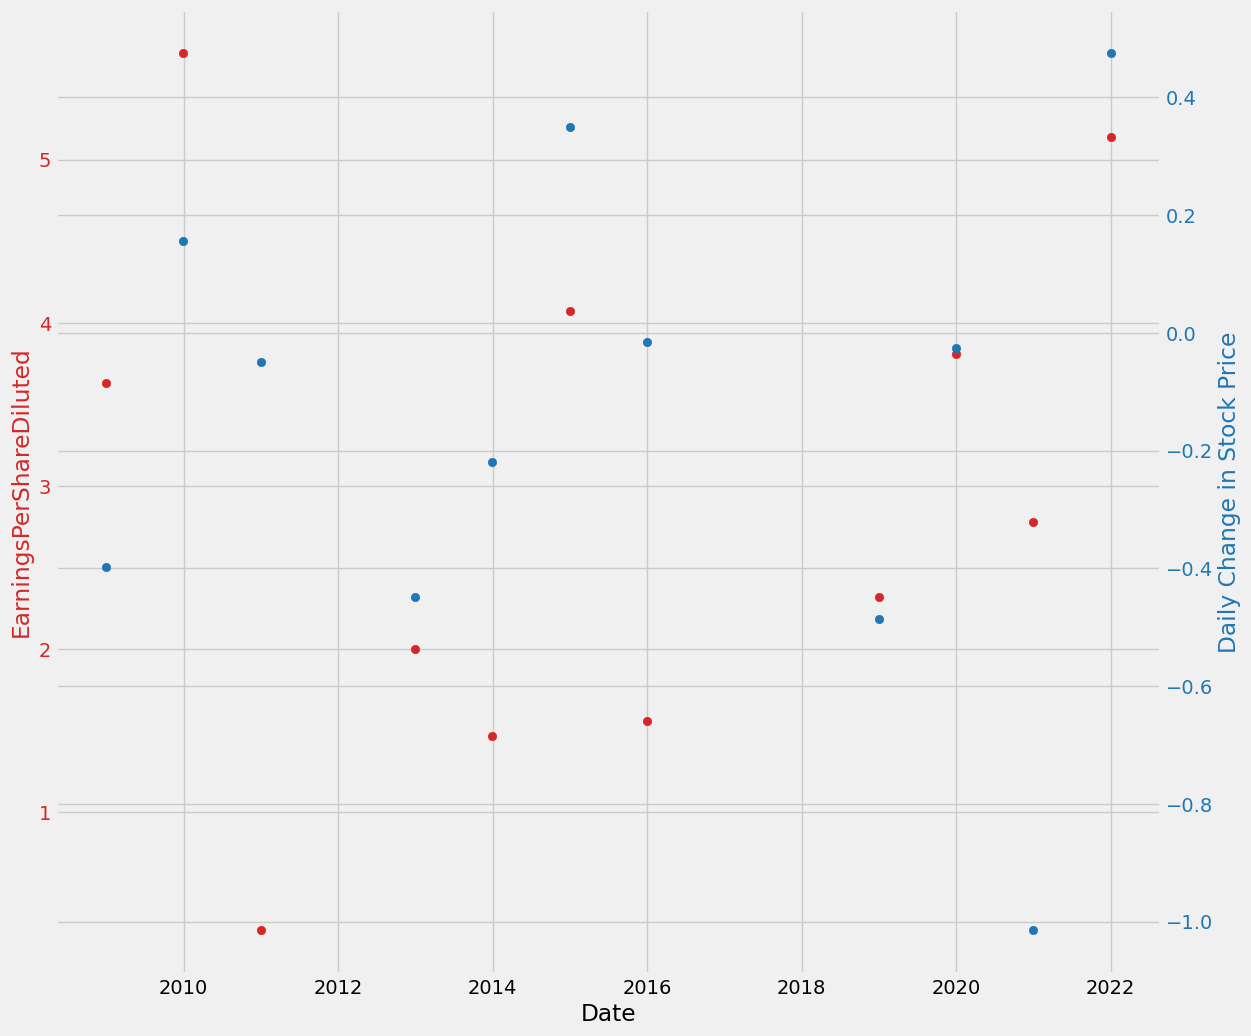

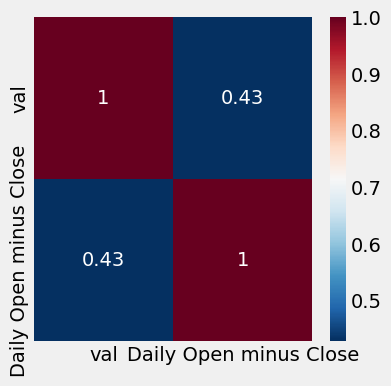






Graphing: IncomeTaxExpenseBenefit


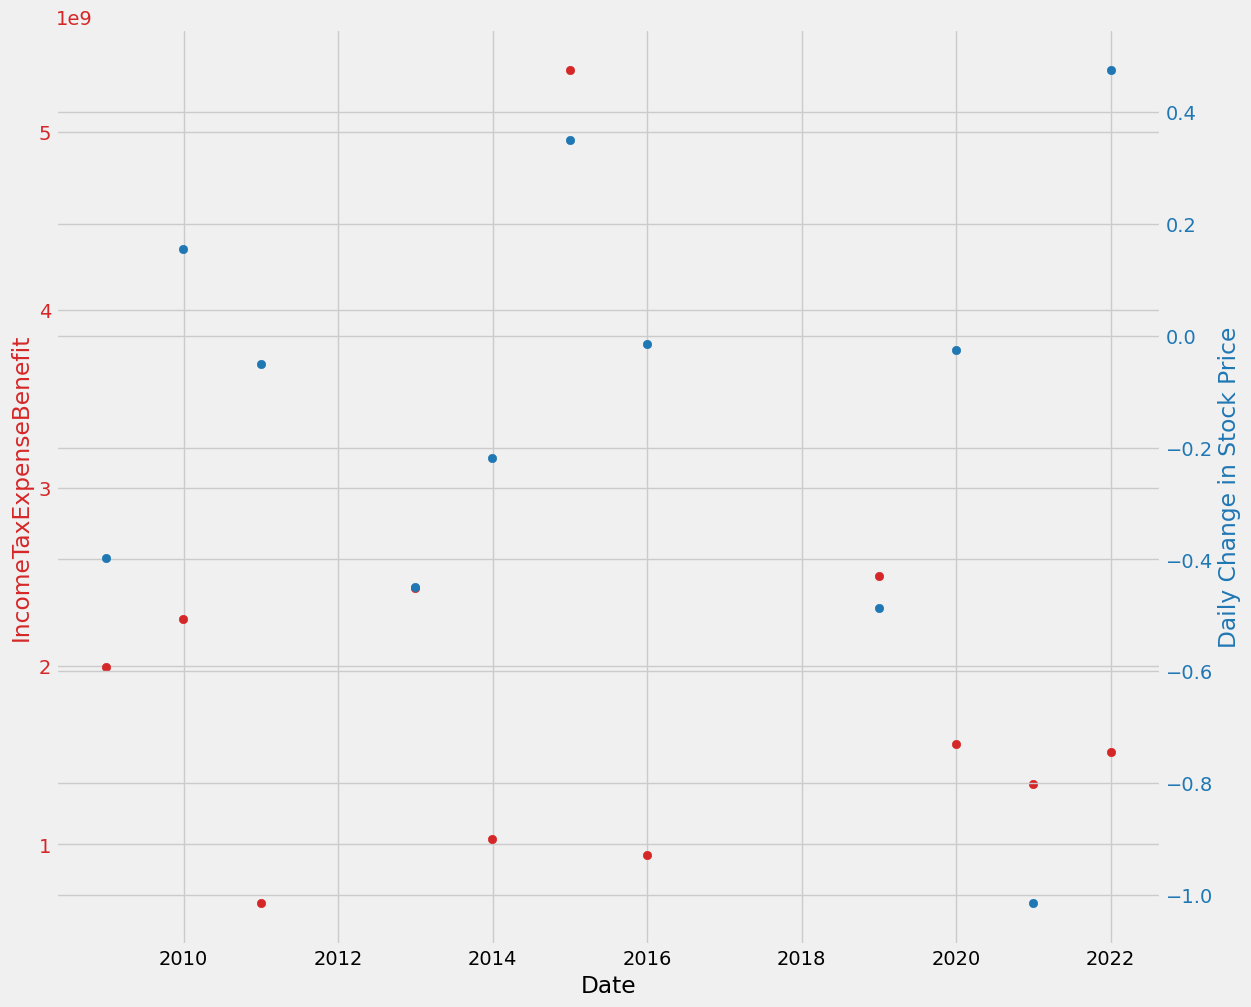

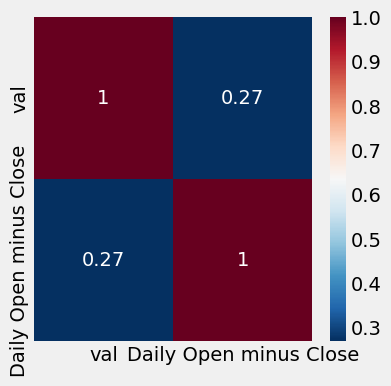






Graphing: NetIncomeLoss


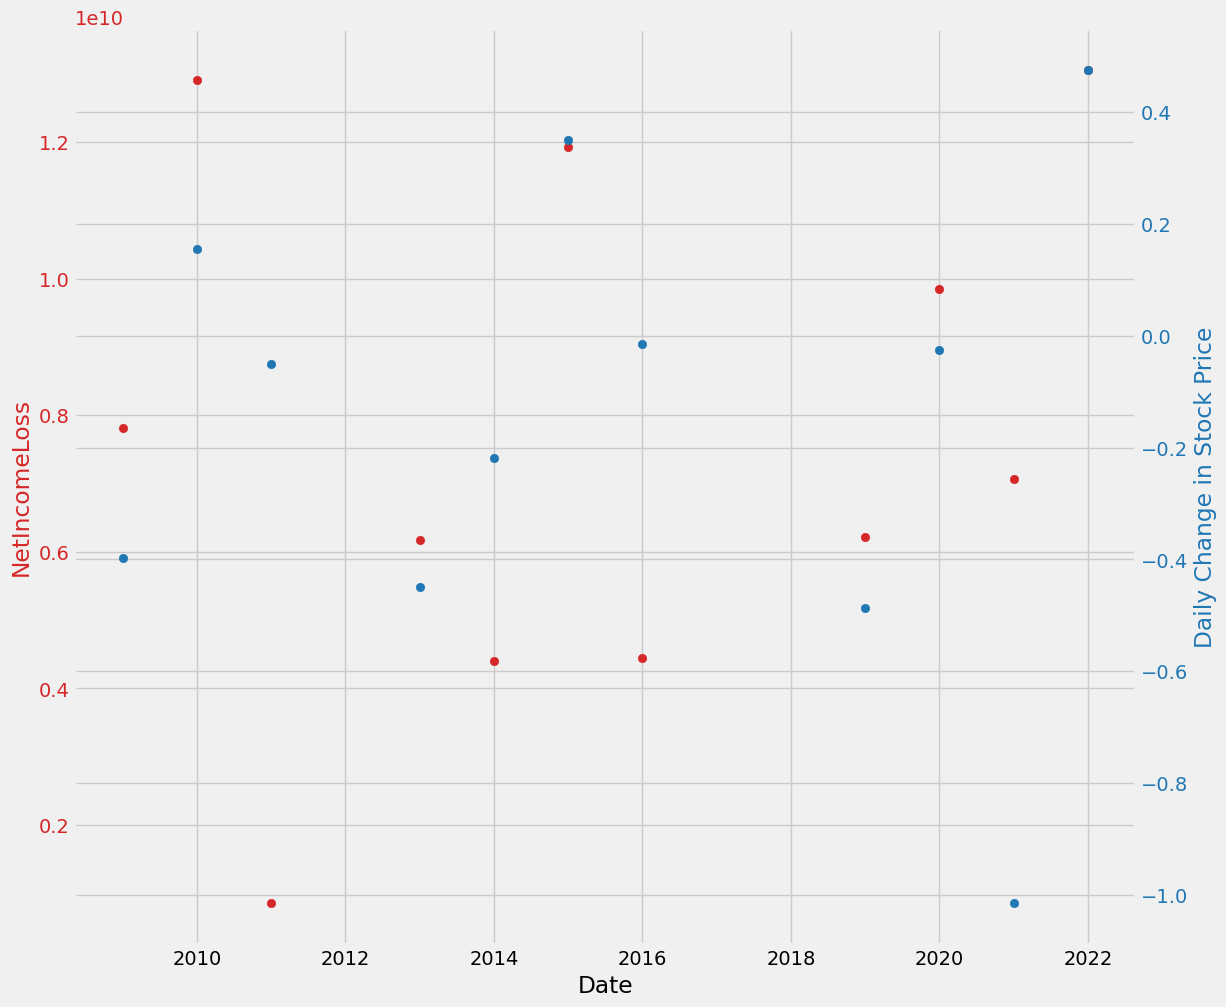

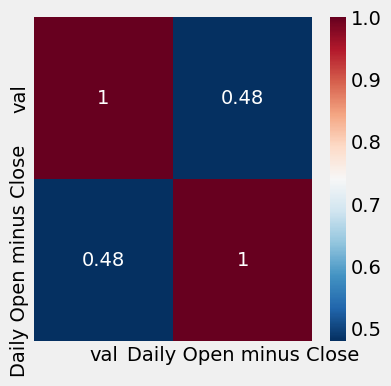






Graphing: OtherNonoperatingIncomeExpense


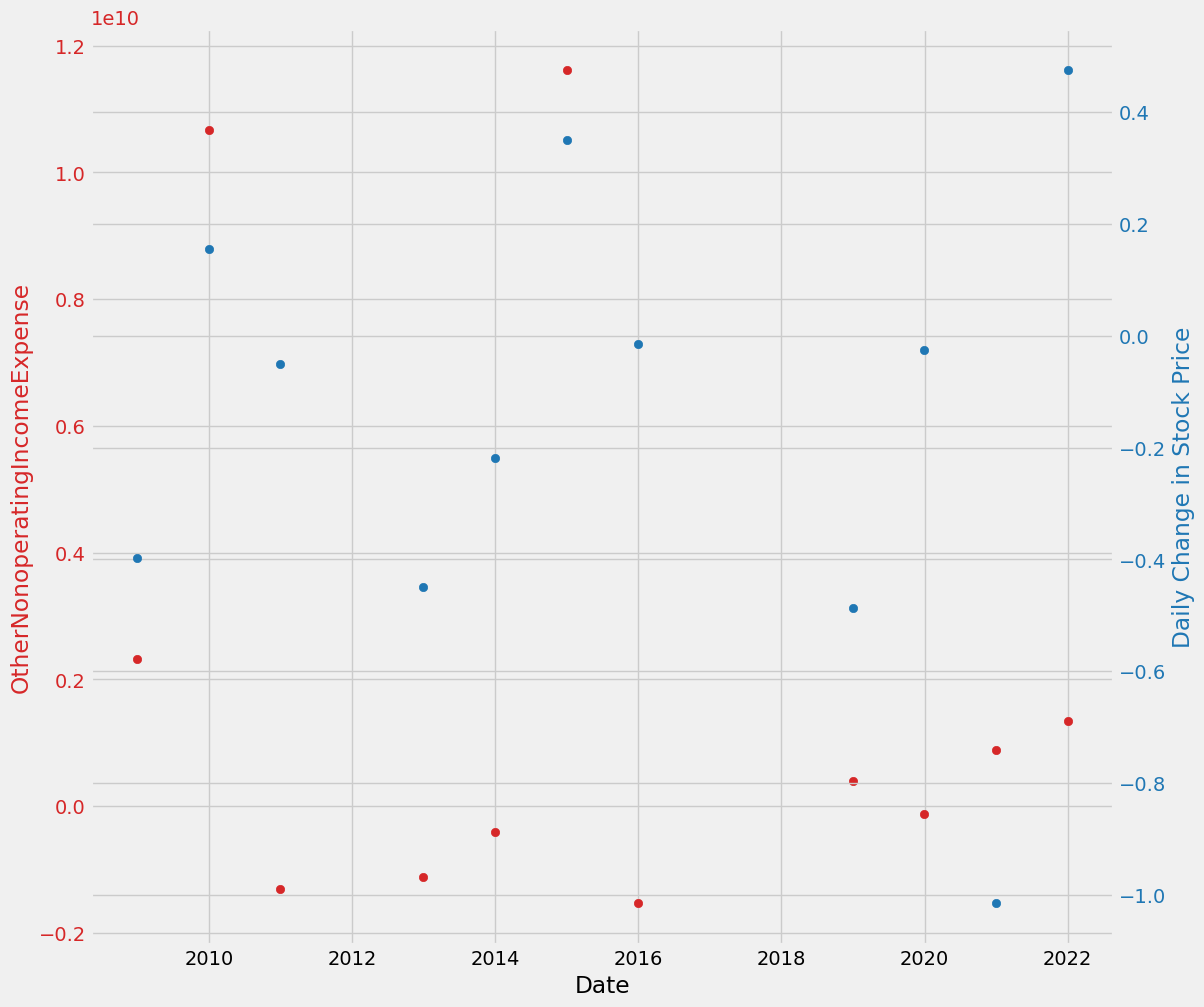

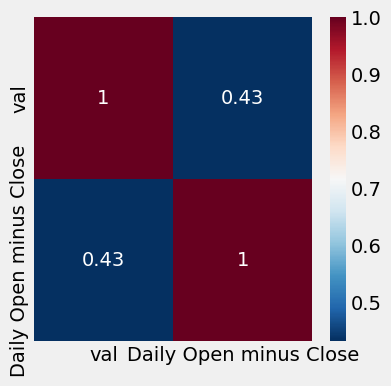






Graphing: ResearchAndDevelopmentExpense


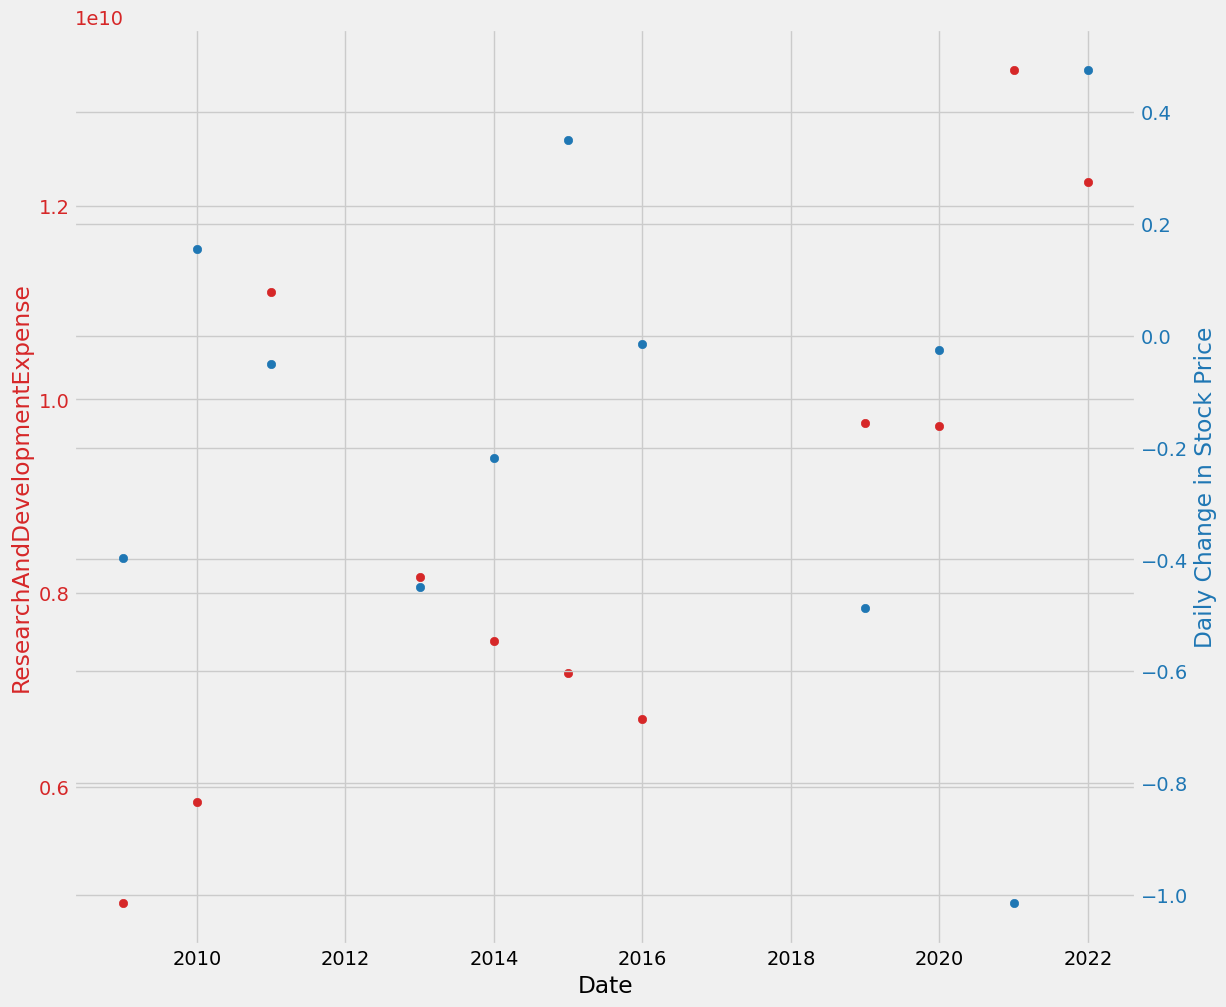

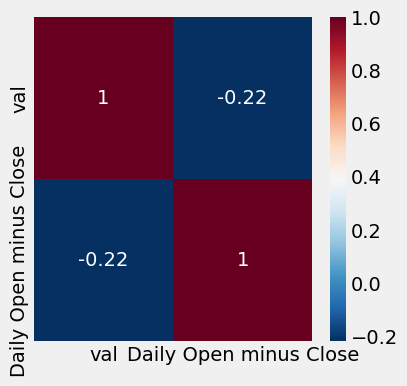






Graphing: SellingGeneralAndAdministrativeExpense


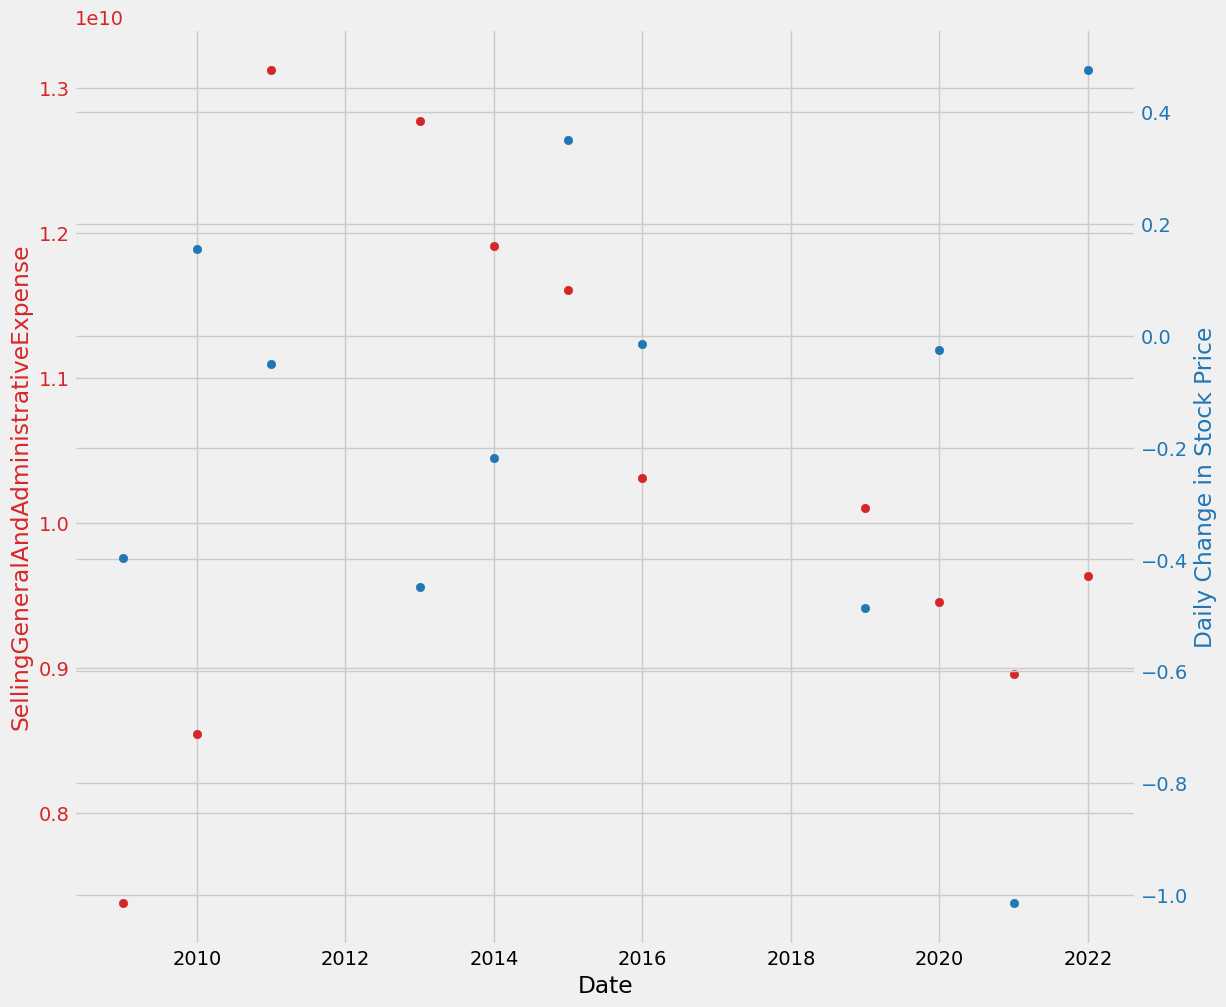

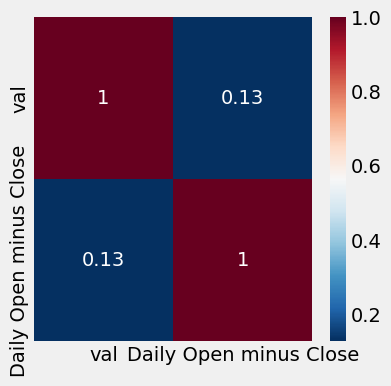






Graphing: NetIncomeLossAttributableToNoncontrollingInterest


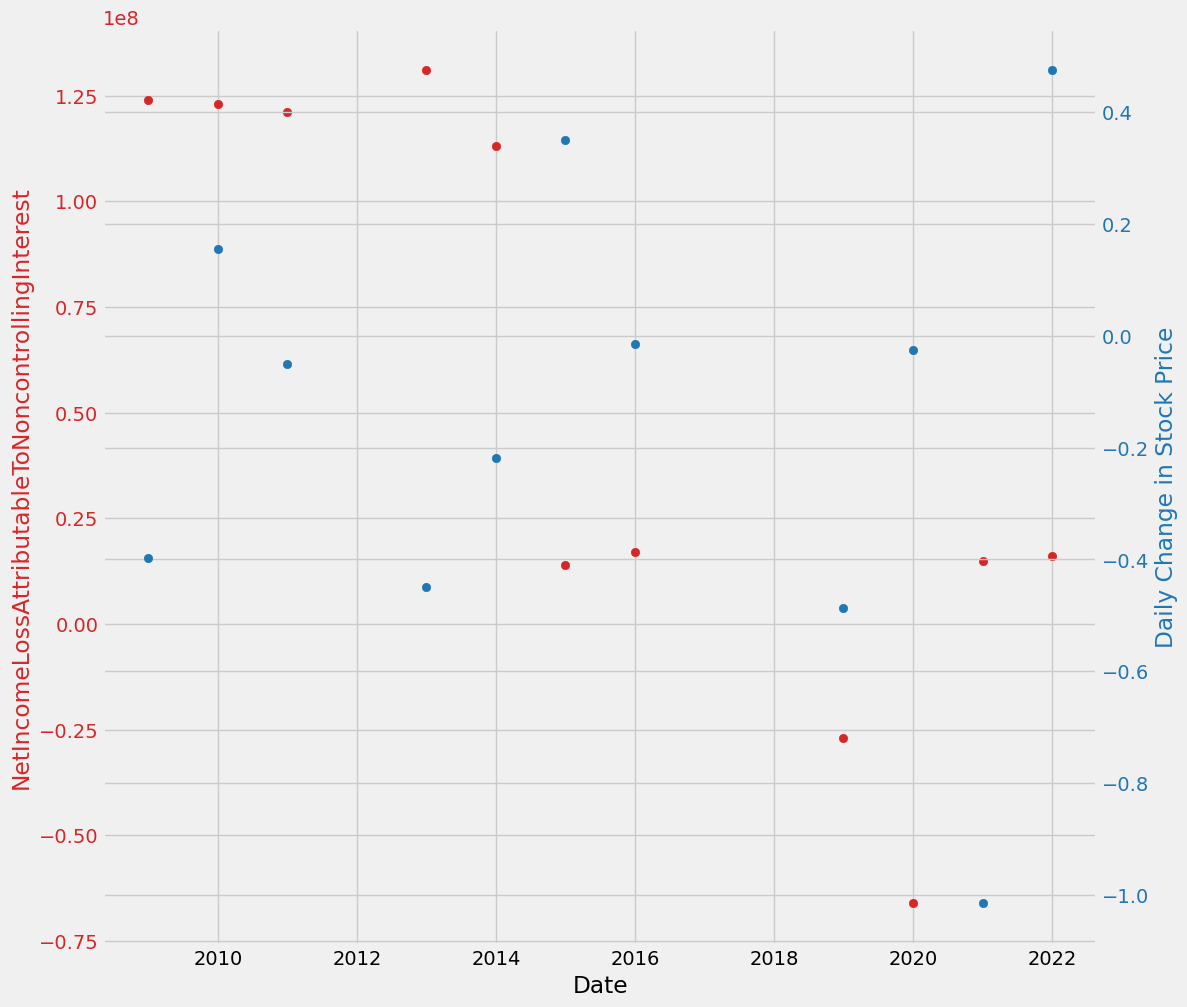

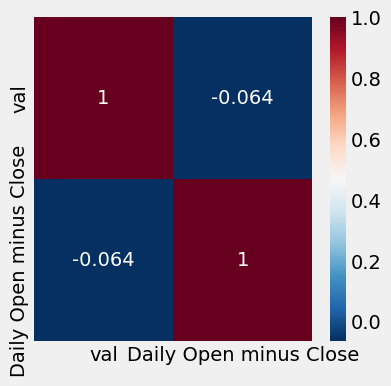






Graphing: RestructuringCharges


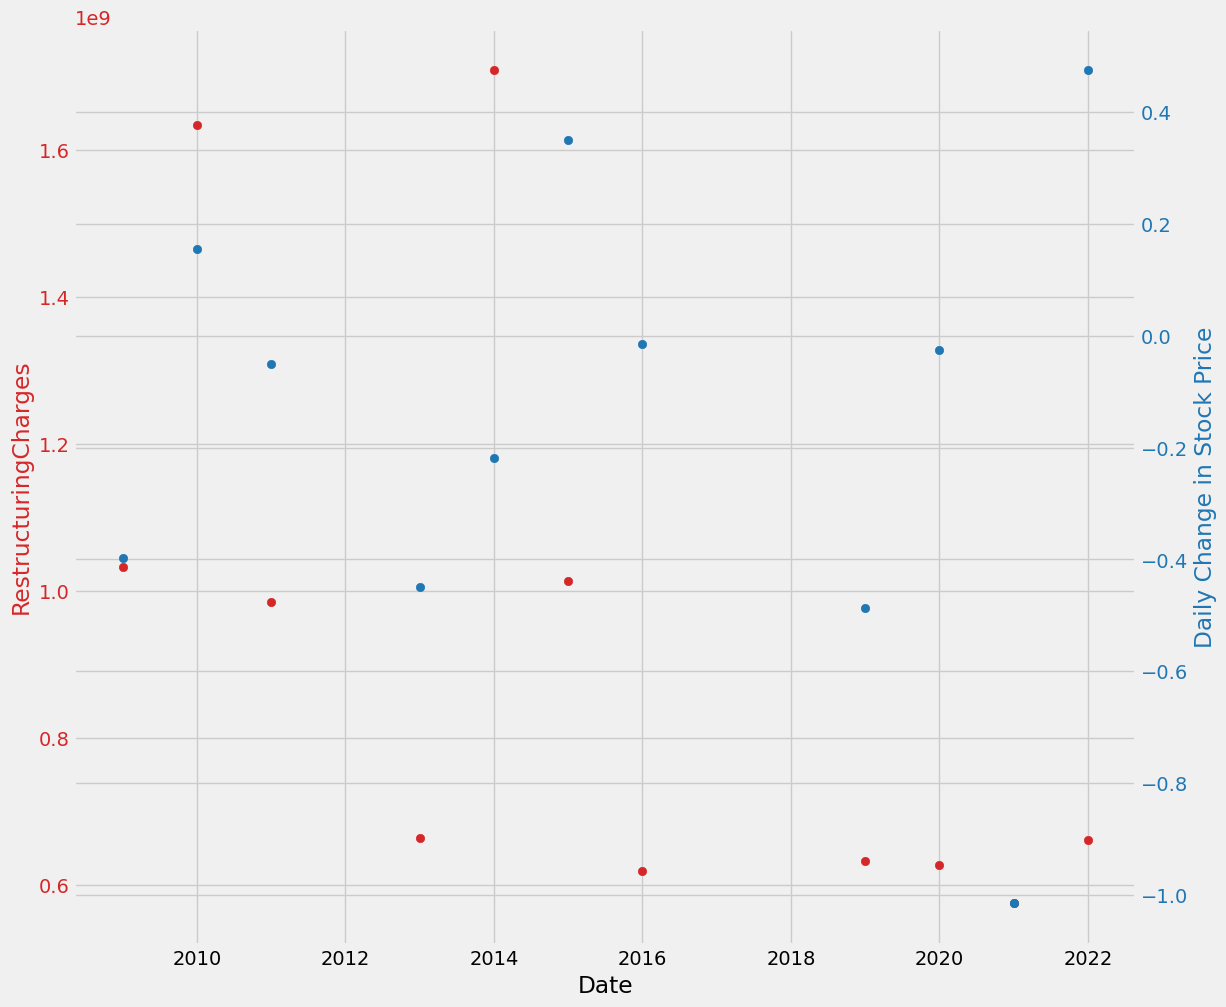

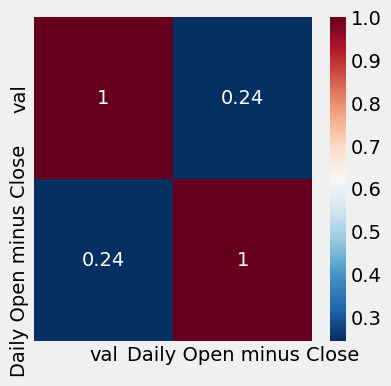






Graphing: EffectiveIncomeTaxRateContinuingOperations


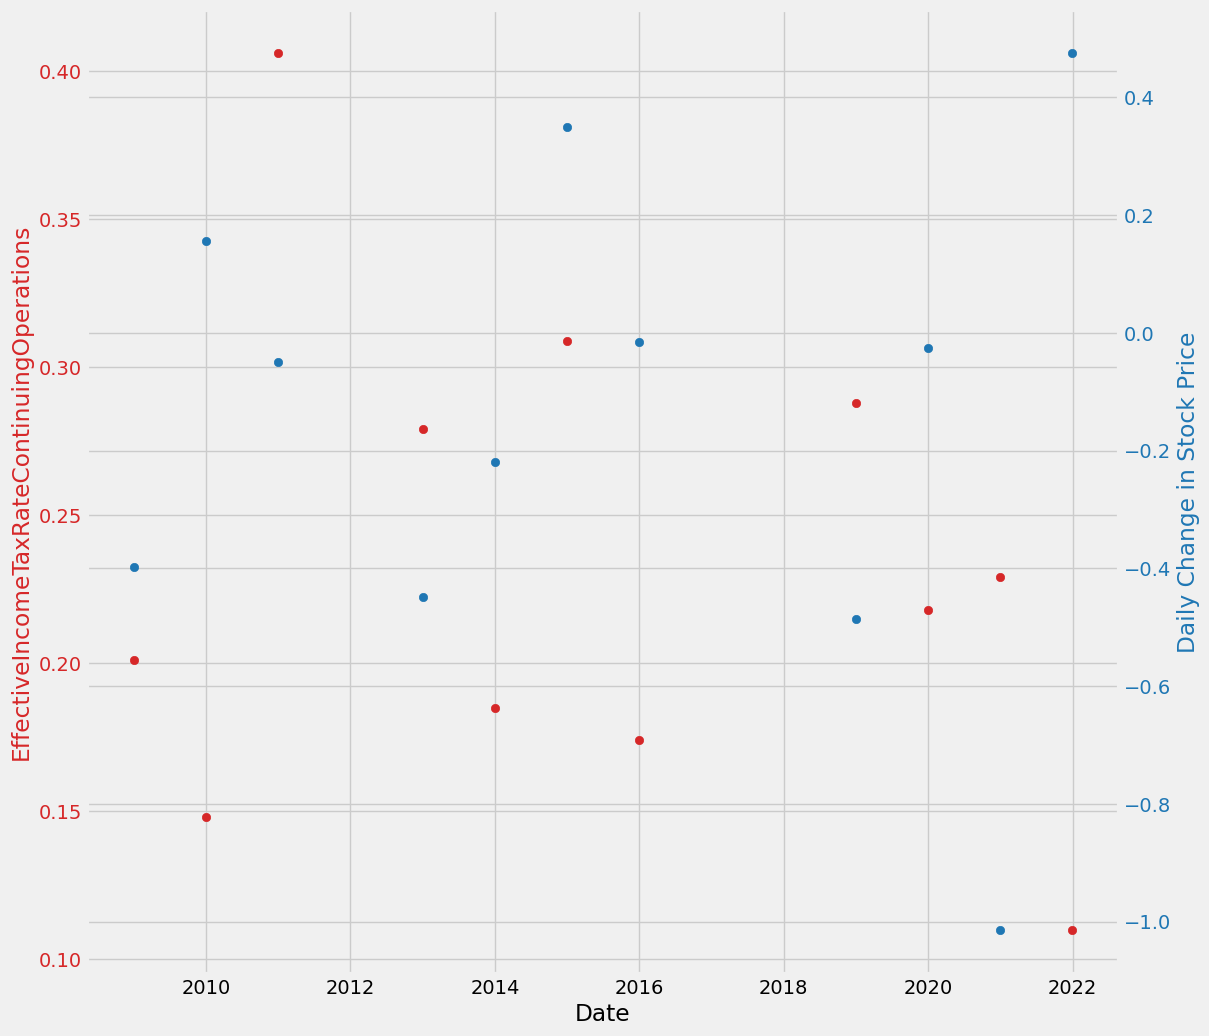

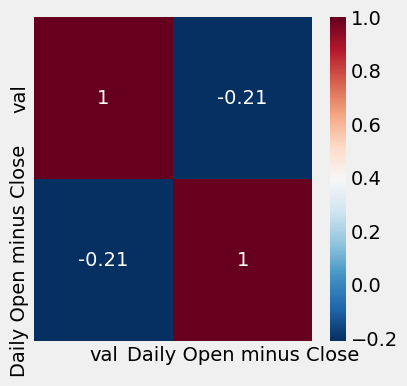






Graphing: ForeignCurrencyTransactionGainLossBeforeTax


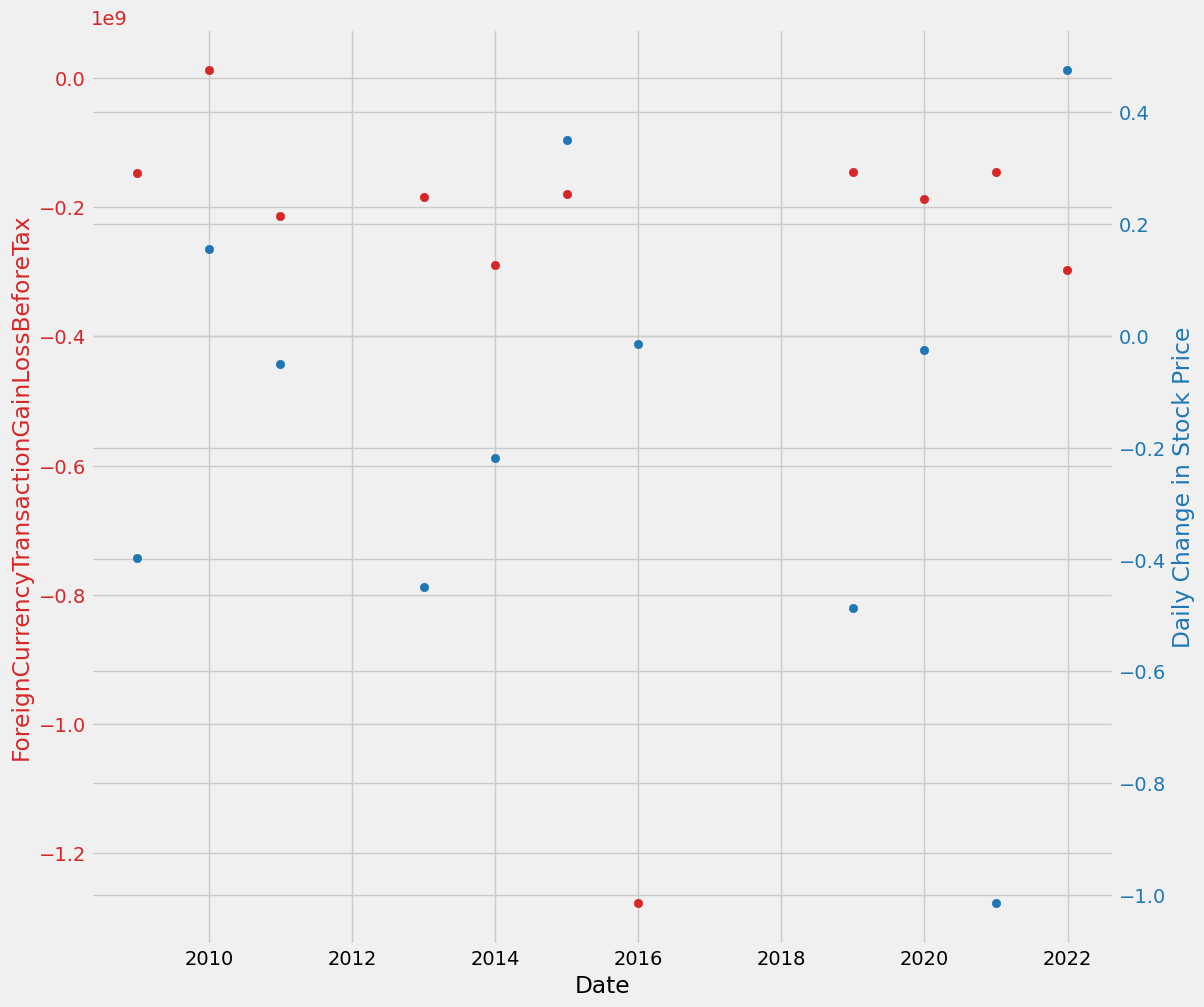

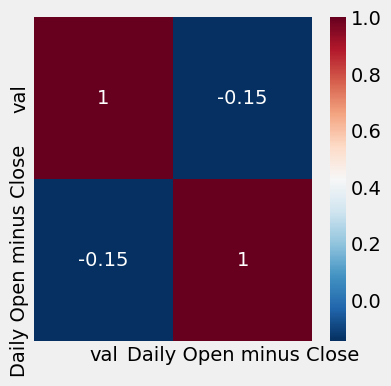






Graphing: InterestExpense


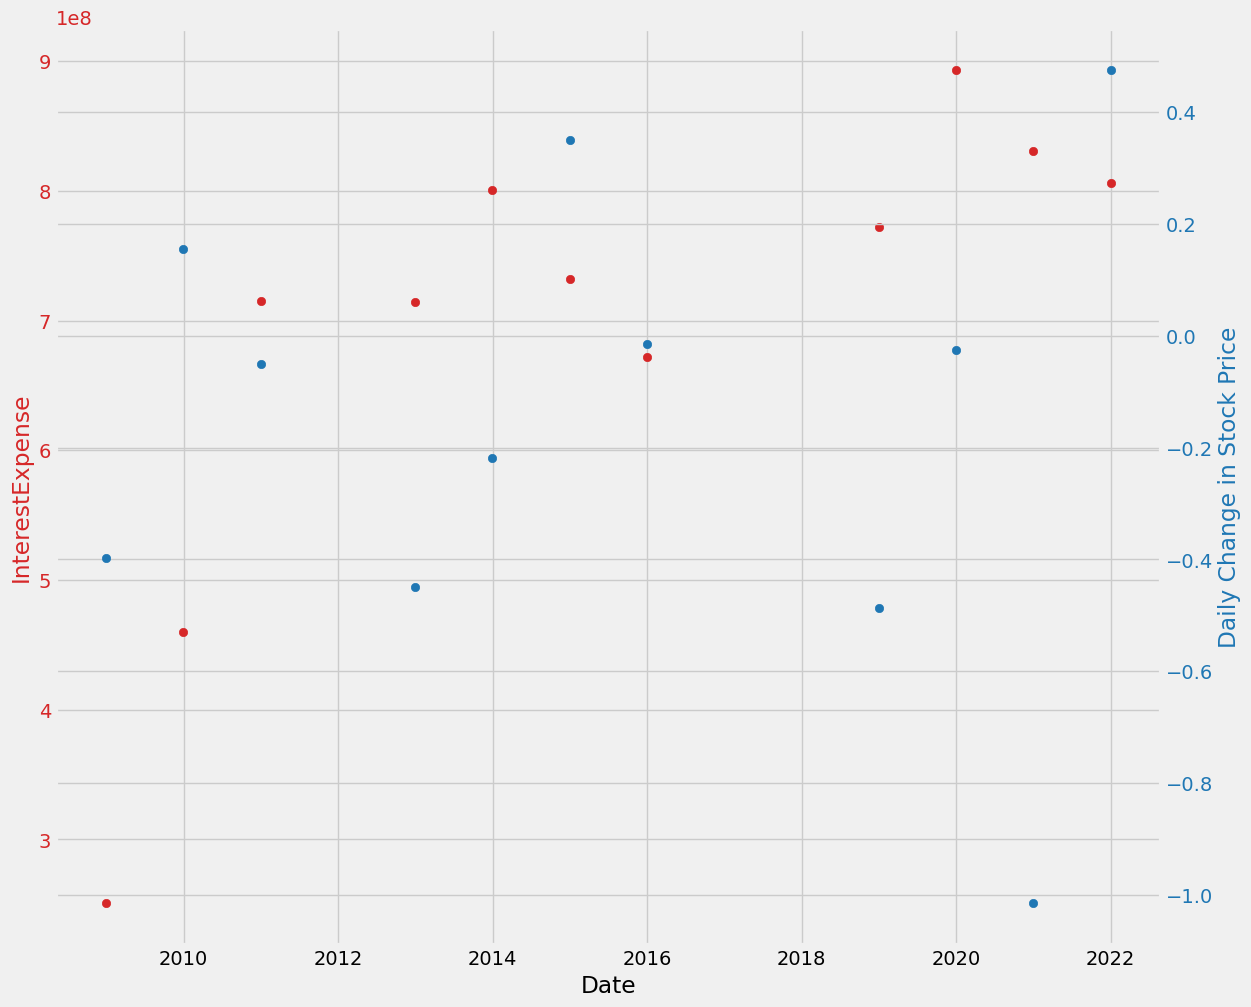

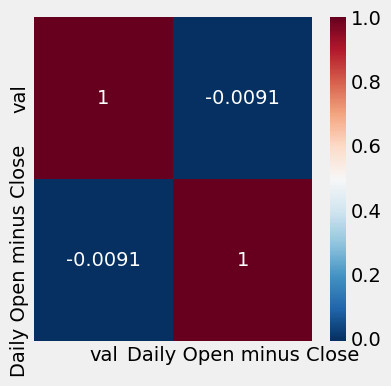






Graphing: InvestmentIncomeInterest


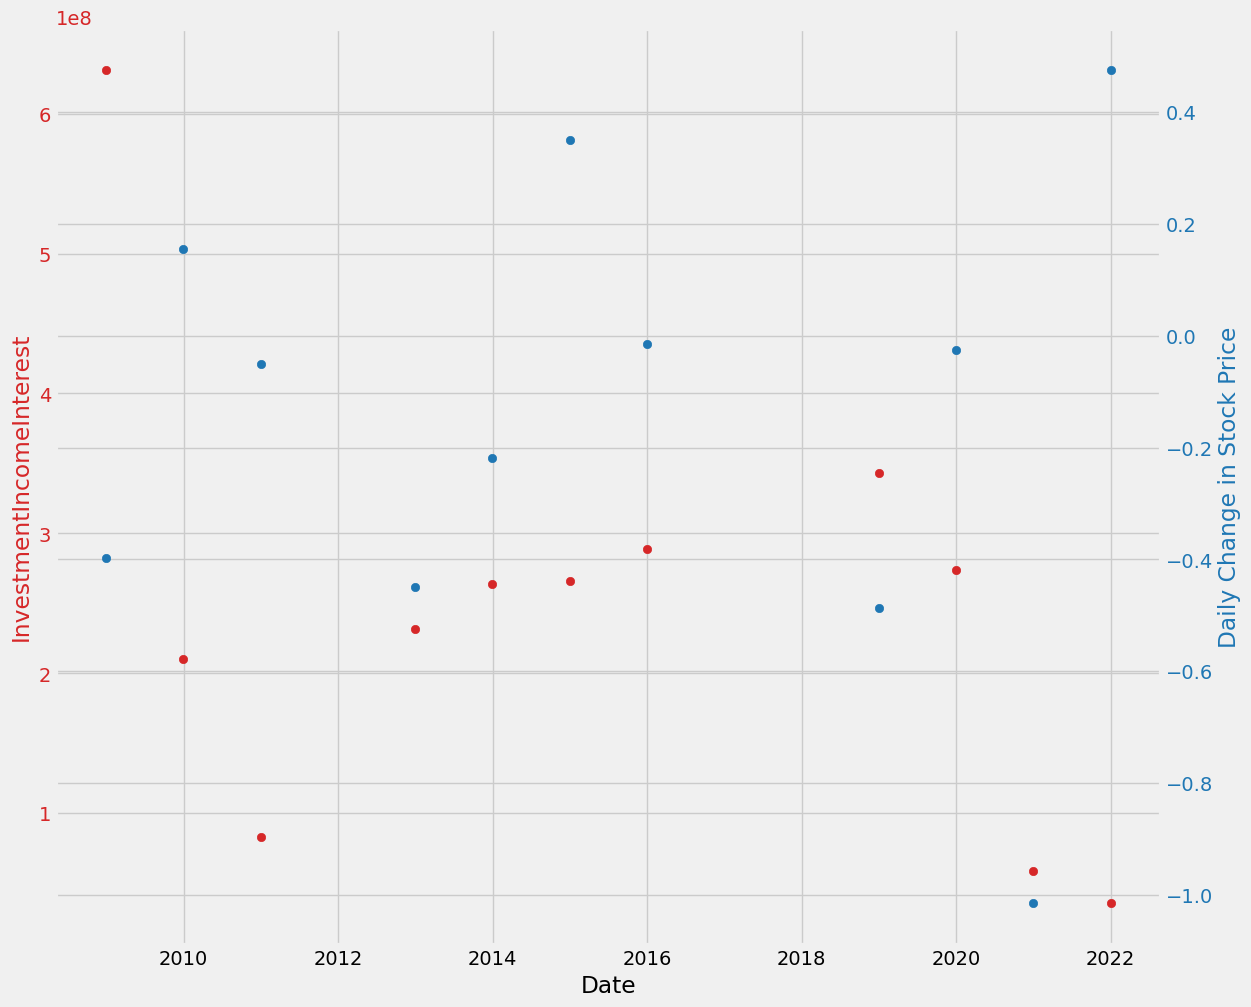

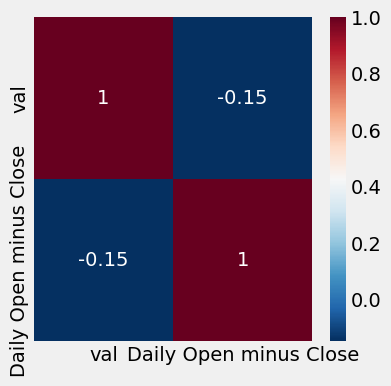






Graphing: WeightedAverageNumberDilutedSharesOutstandingAdjustment


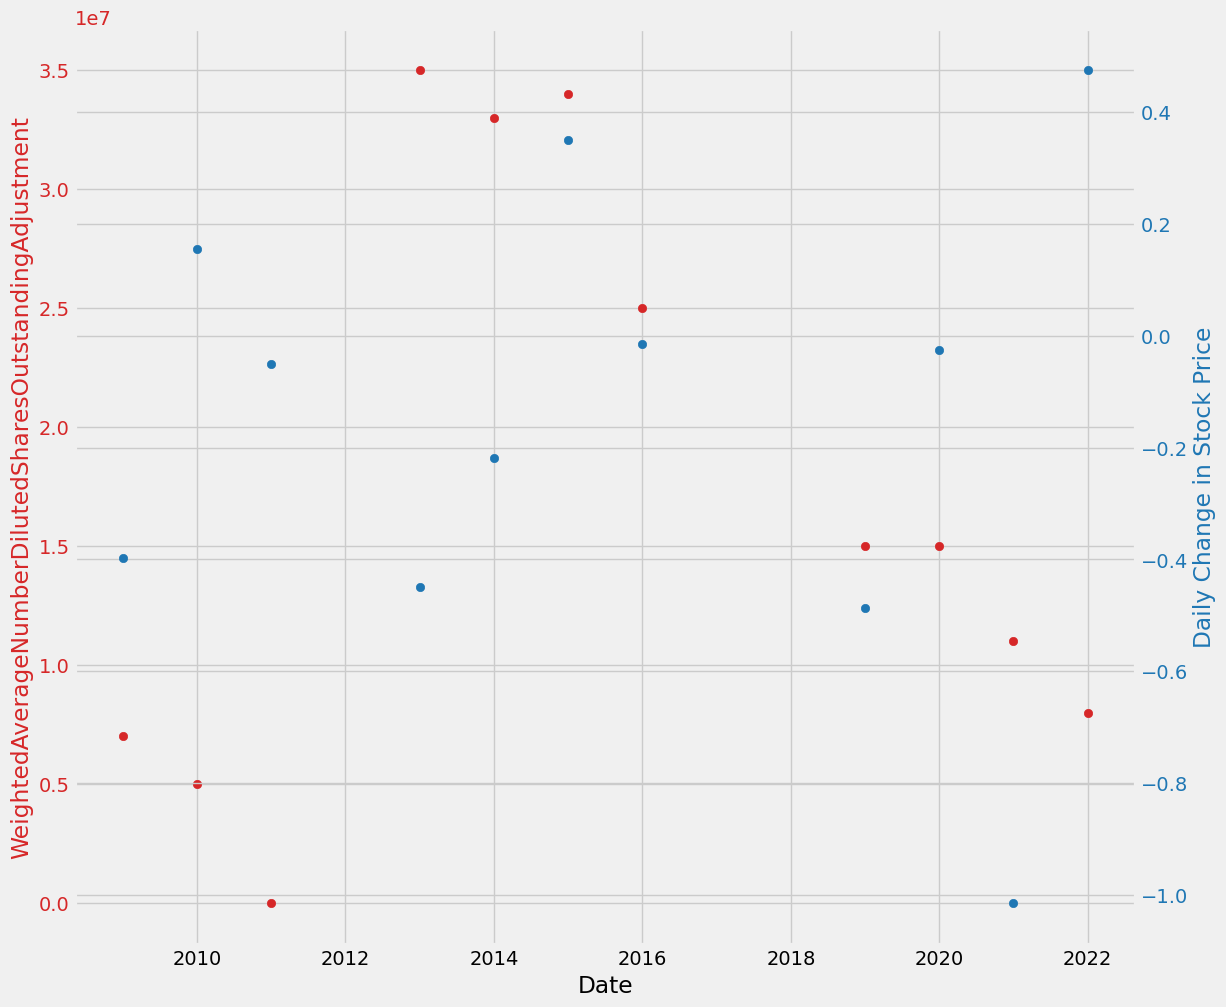

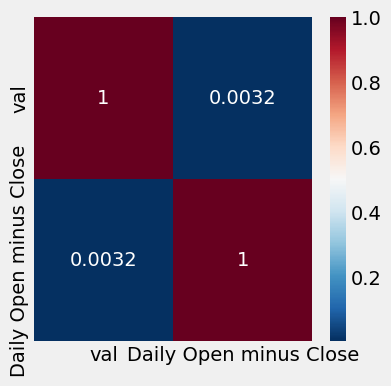






Graphing: WeightedAverageNumberOfDilutedSharesOutstanding


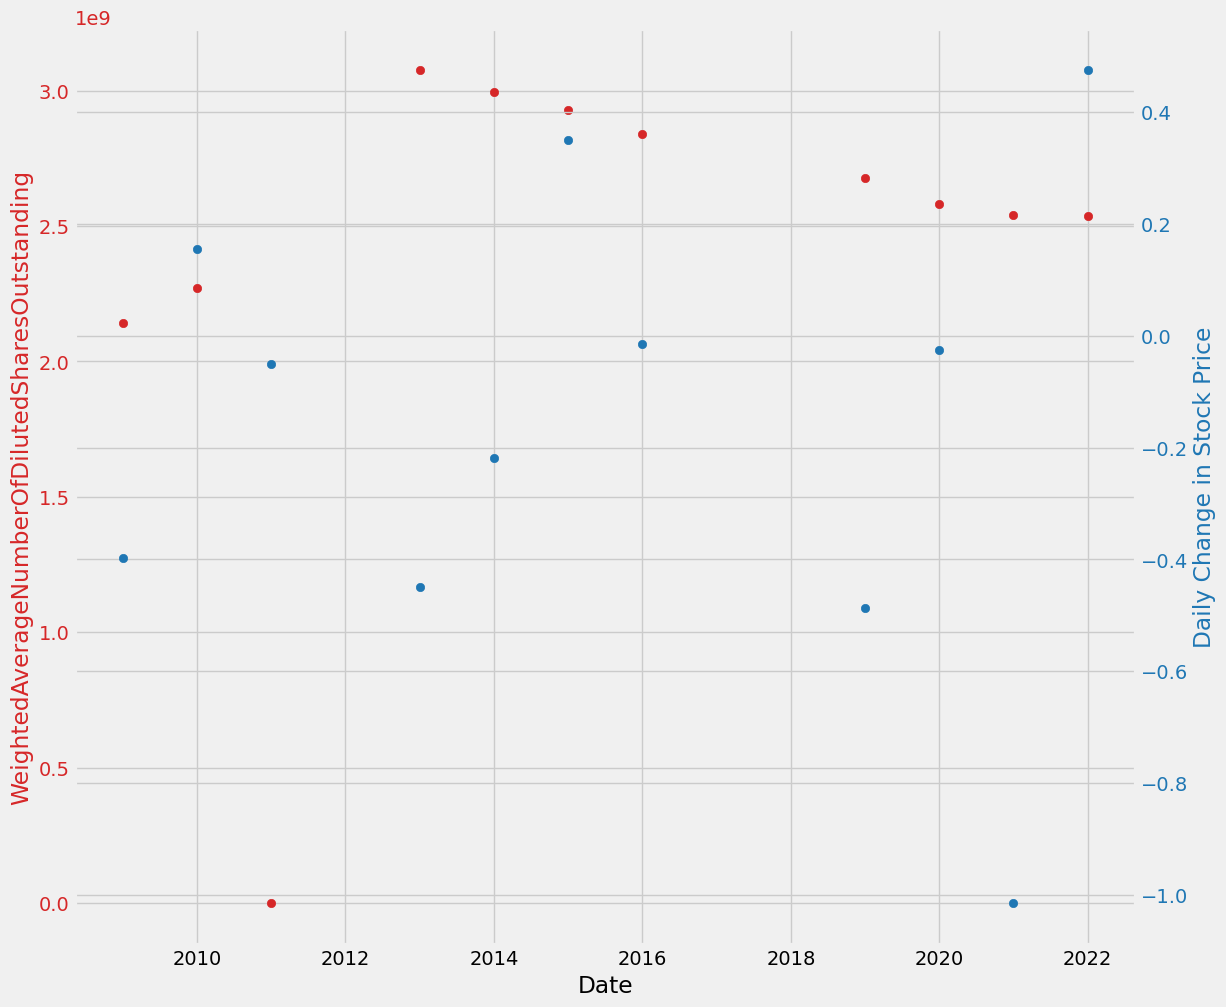

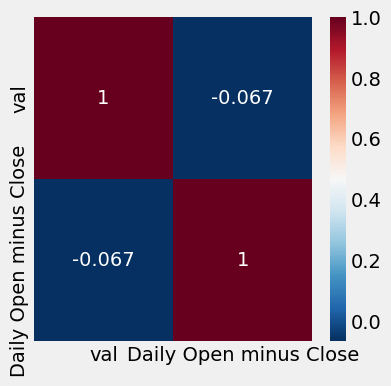






Graphing: WeightedAverageNumberOfSharesOutstandingBasic


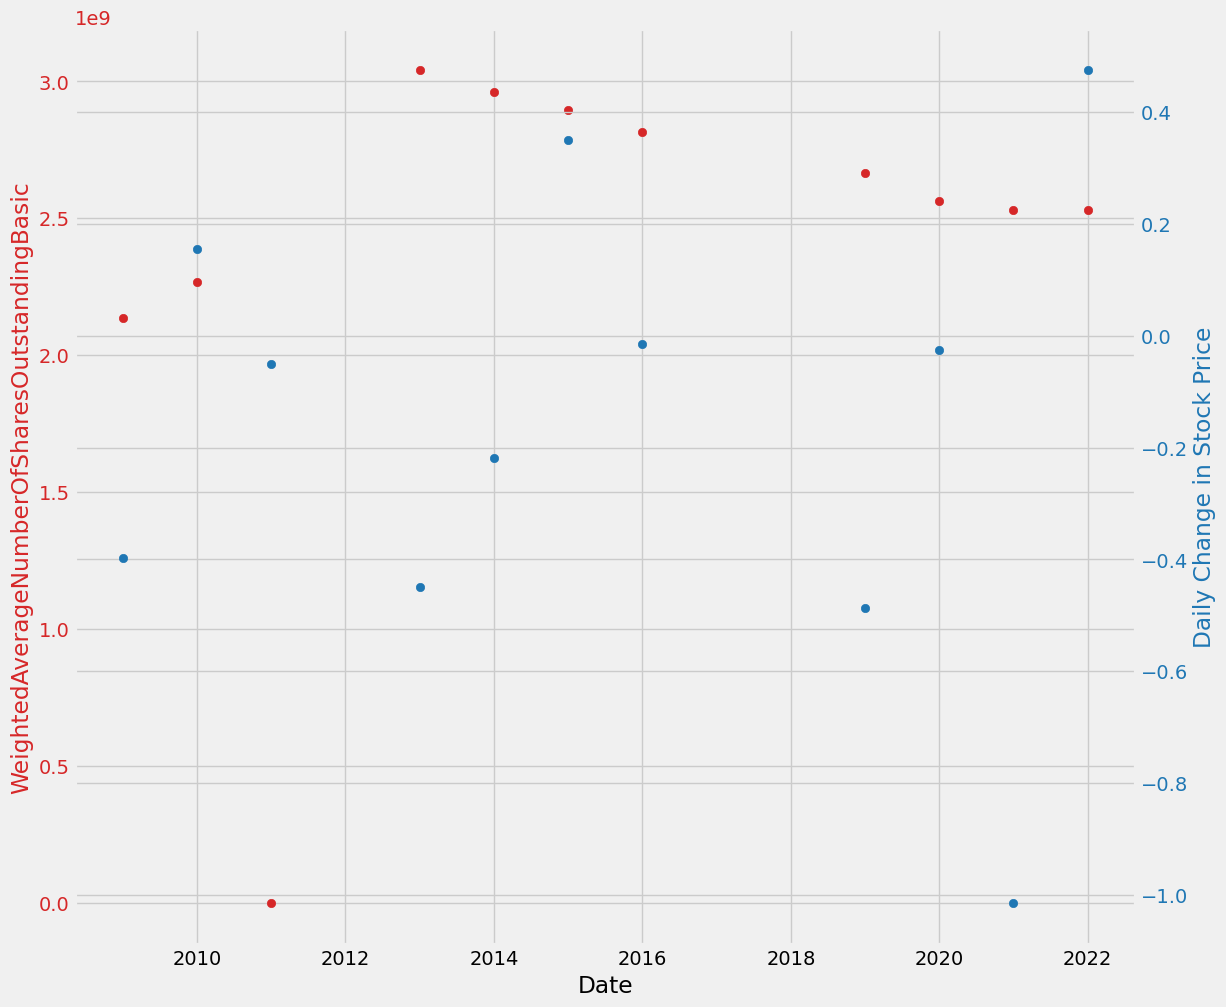

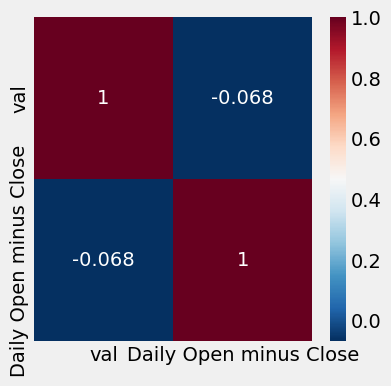






Graphing: AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount


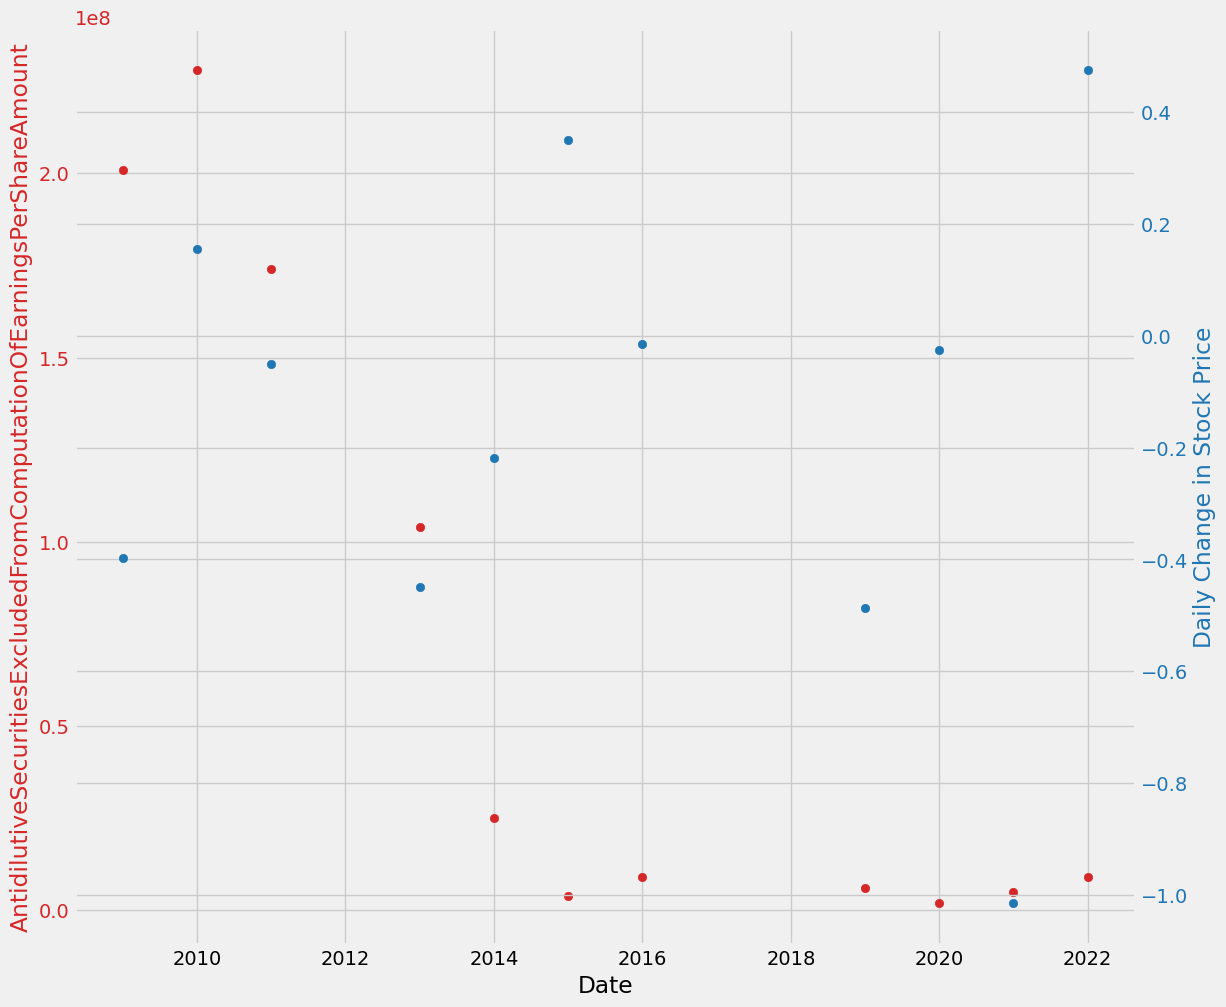

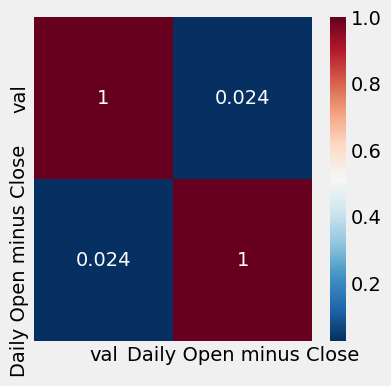






Graphing: RestructuringAndRelatedCostIncurredCost


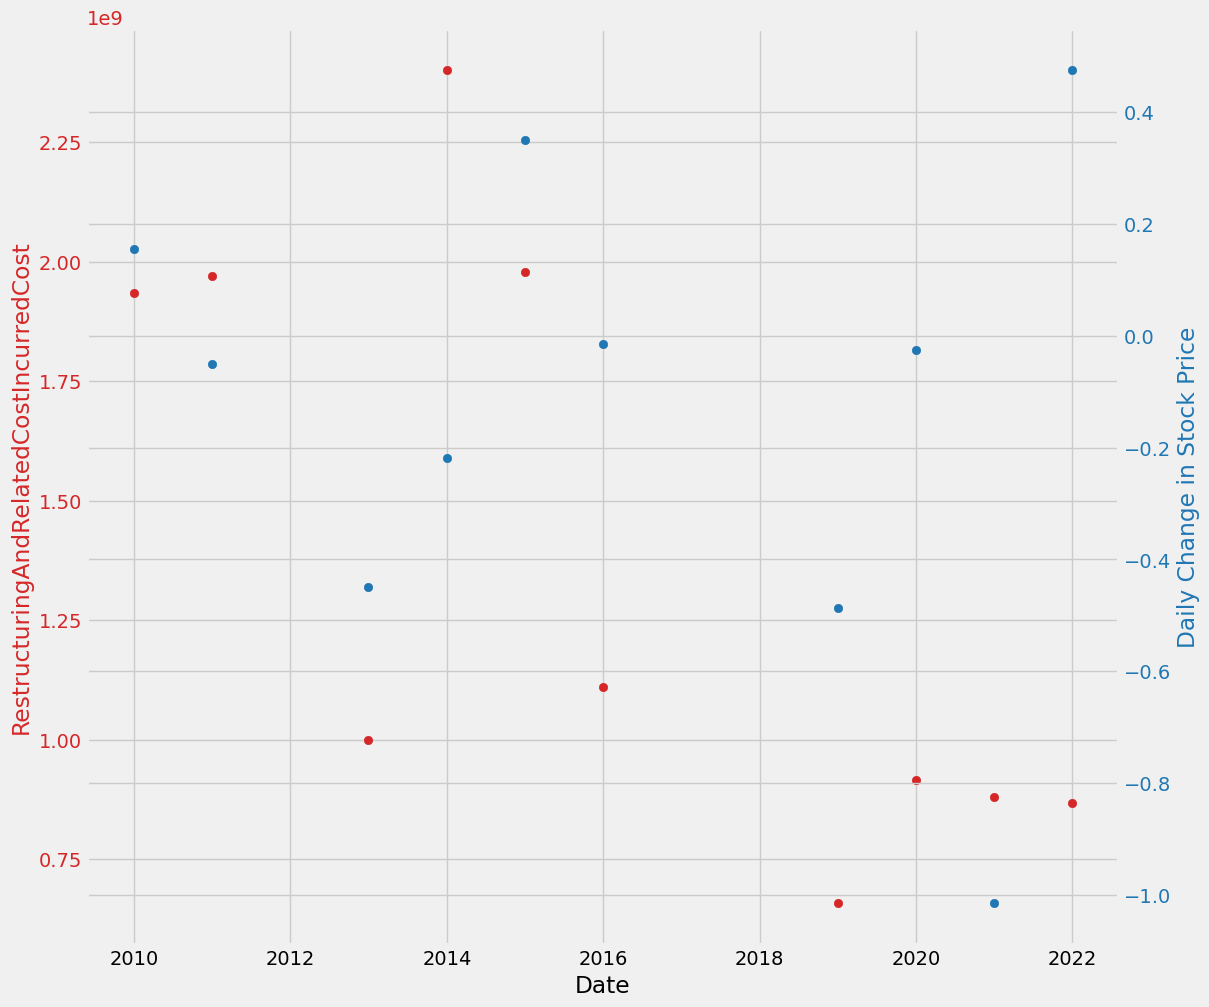

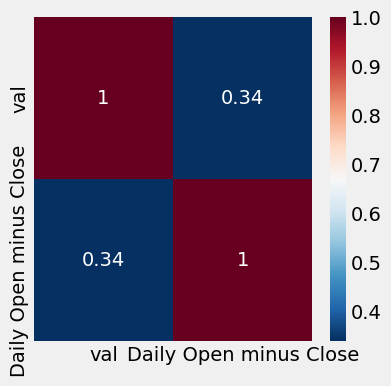






Graphing: CashAndCashEquivalentsAtCarryingValue


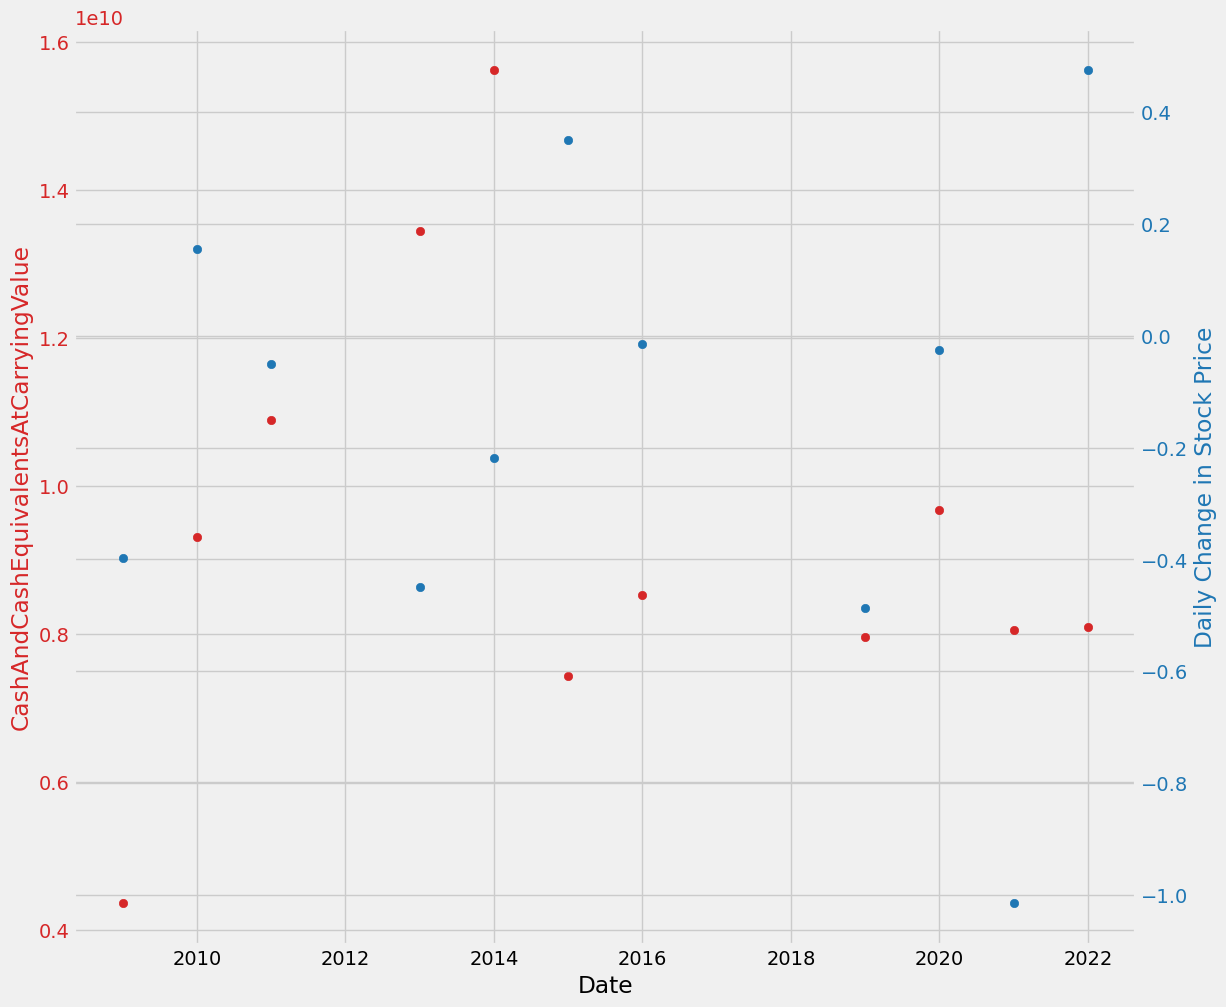

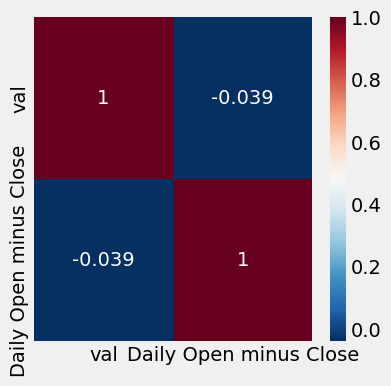






Graphing: ShareBasedCompensation


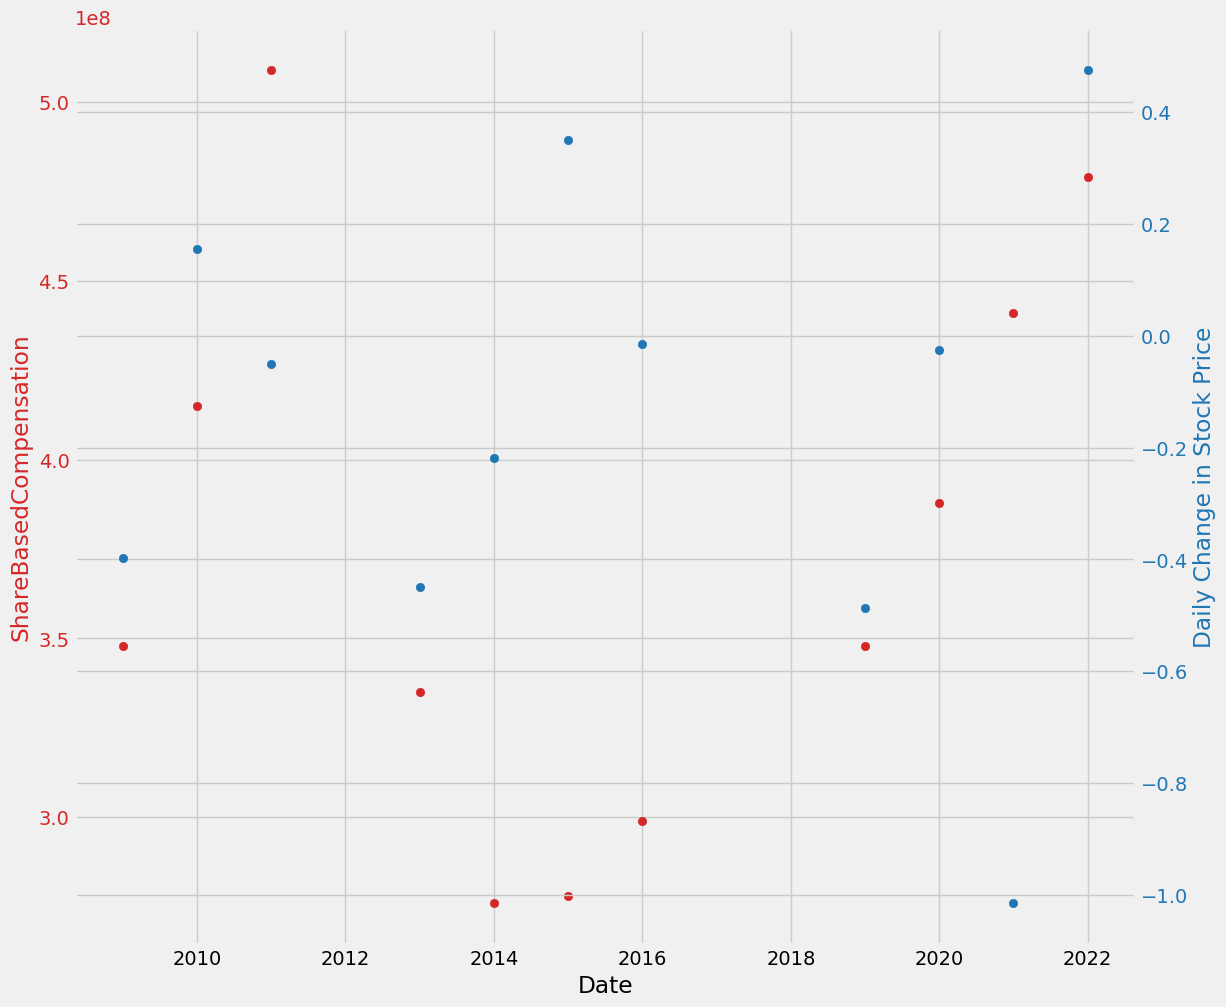

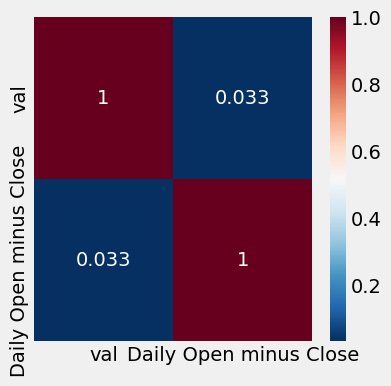






Graphing: IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest


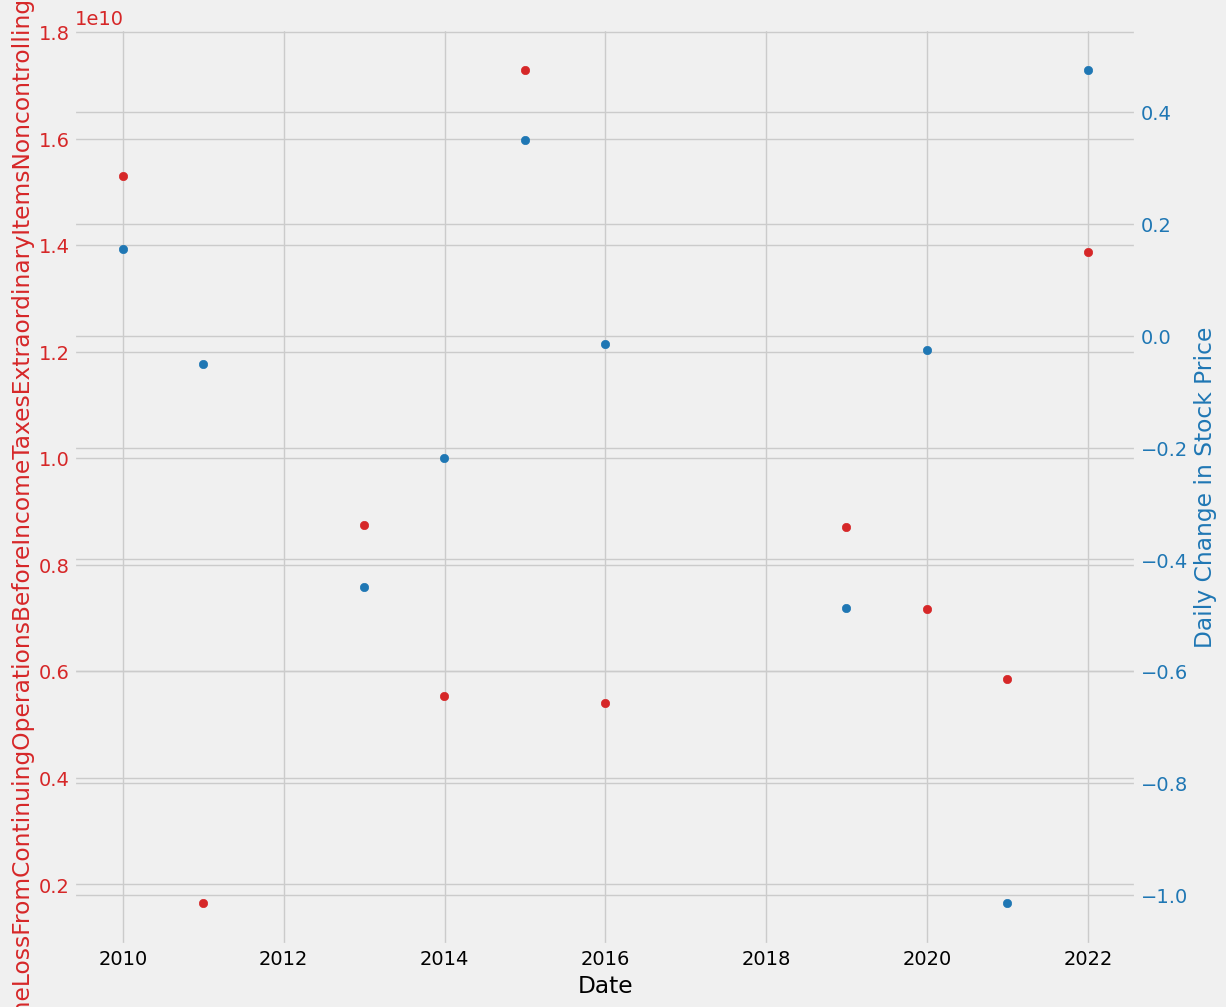

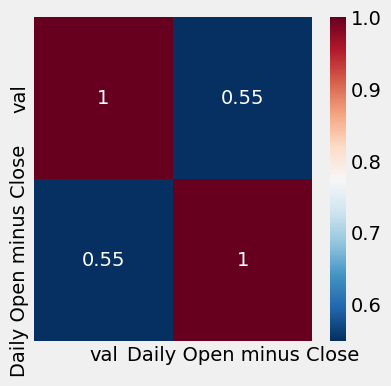






Graphing: ProfitLoss


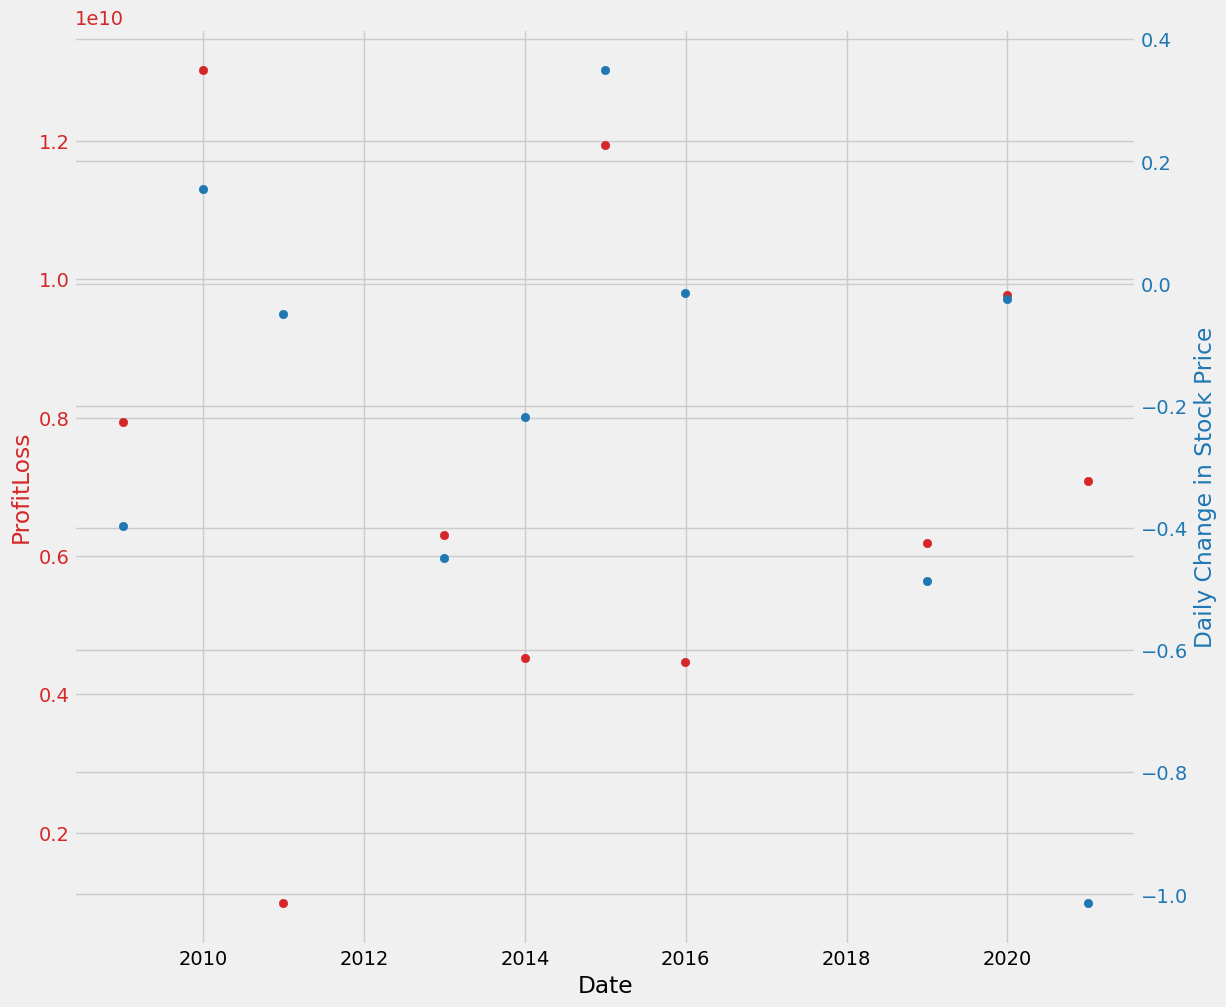

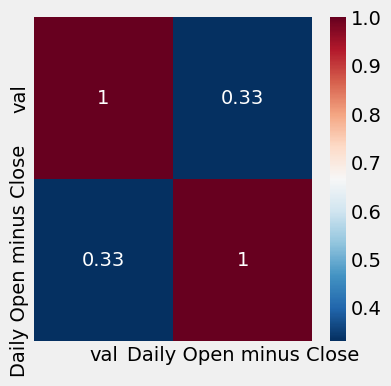






Graphing: AccumulatedOtherComprehensiveIncomeLossNetOfTax


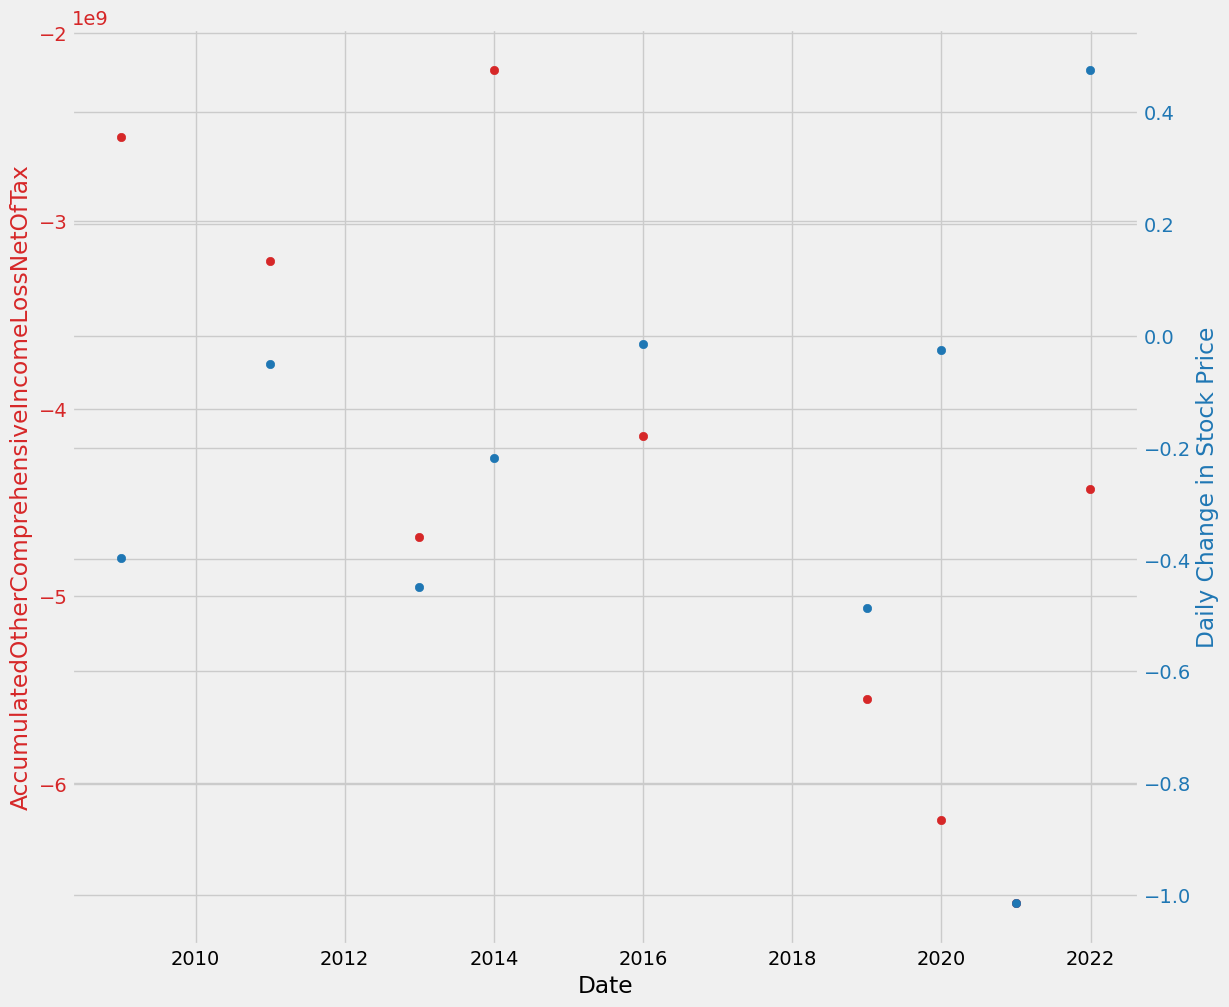

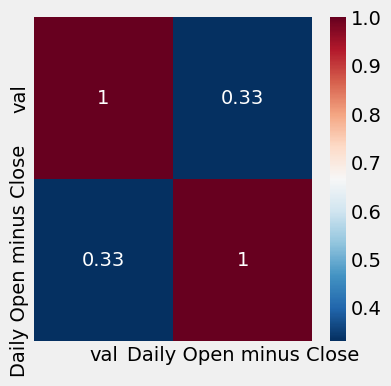

In [220]:
#iteratively call above function
for i in range(25):
  print("Graphing:", merckDataZip_sortBySize[i][0])
  sec_stock_df_i = sec_stock_merge_df(merckDataZip_sortBySize[i][1], mrk_stock_price)
  plot_sec_stock(sec_stock_df_i, merckDataZip_sortBySize[i][0])
  corr_sec_stock(sec_stock_df_i)
  print()
  print()
  print()
  print()
  print()

In [221]:
import os

#let's compare SEC features between companies.
def getSetOfFiles(path):
  mySet = {file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))}
  return mySet

In [222]:
nestedListOfAllSECData = list()
secDatasetPath = '/content/drive/MyDrive/DSCI 631 Assignments and Project/Project/Final Project/Datasets/SEC'
currentSet = set()

for dir in os.listdir(secDatasetPath):
  currentSet = getSetOfFiles(os.path.join(secDatasetPath, dir))
  if len(currentSet) != 0:
    nestedListOfAllSECData.append(currentSet)
  else:
    print(dir, " is empty")

In [223]:
#datasets / features that appear in non empty folder
set.intersection(*nestedListOfAllSECData)

{'Assets.csv',
 'LiabilitiesAndStockholdersEquity.csv',
 'NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv'}

In [224]:
import random as ra

#let's randomly sample 100 public companies
nestedListCopy = nestedListOfAllSECData.copy()
randomSelectionFromNestedList = list()
myRandomChoice = set()


for i in range(100):
  myRandomChoice = ra.choice(nestedListCopy)
  randomSelectionFromNestedList.append(myRandomChoice)
  nestedListCopy.remove(myRandomChoice)

set.intersection(*randomSelectionFromNestedList)

{'AccumulatedOtherComprehensiveIncomeLossNetOfTax.csv',
 'Assets.csv',
 'LiabilitiesAndStockholdersEquity.csv',
 'NetCashProvidedByUsedInFinancingActivities.csv',
 'NetCashProvidedByUsedInInvestingActivities.csv',
 'StockholdersEquity.csv',
 'WeightedAverageNumberOfDilutedSharesOutstanding.csv',
 'WeightedAverageNumberOfSharesOutstandingBasic.csv'}